# 경로 확인

In [1]:
getwd()

[1] "C:/Users/codnj/MyProject/데이터 마이닝 프로젝트 - 머신러닝을 활용한 상수도관 누수 감지"

In [2]:
list.files()

[1] "데이터 마이닝 프로젝트 - 머신러닝을 활용한 상수도관 누수 감지 .ipynb"
[2] "상하수도 데이터(상수관로 누수 감지)"

In [1]:
.libPaths()

[1] "C:/Users/codnj/anaconda3/Lib/R/library"

# 라이브러리 설치 및 불러오기

In [1]:
library(purrr)
library(dplyr)
library(caret)
library(class)
library(rpart)
library(e1071)
library(xgboost)
library(randomForest)
library(pROC)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift



Attaching package: 'xgboost'


The following object is masked from 'package:dplyr':

    slice


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


The following object is masked from 'package:dplyr':

    combine


Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var




# 데이터 통합

In [13]:
file1_path<-"상하수도 데이터(상수관로 누수 감지)/Training/누수감지데이터셋(Training)"
file2_path<-"상하수도 데이터(상수관로 누수 감지)/Validation/누수감지데이터셋(Validation)"

files1<-list.files(path=file1_path, pattern="*.csv", full.names=TRUE)
files2<-list.files(path=file2_path, pattern="*.csv", full.names=TRUE)

In [14]:
#library(purrr)
merged_data<-map_dfr(c(files1, files2), read.csv)

Warning message in bind_rows_(x, .id):
"Unequal factor levels: coercing to character"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"Unequal factor levels: coercing to character"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"Unequal factor levels: coercing to character"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into charac

In [15]:
merged_data

site,sid,ldate,lrate,llevel,leaktype,X0HZ,X10HZ,X20HZ,X30HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
S-4687025030,S-0359369085120315,20200708,90,256,out,0,18,19,16,...,4690,243,4710,284,4700,324,4670,230,4710,260
S-4677025028,S-0359369083968368,20190601,90,542,out,0,4,2,4,...,310,423,300,711,270,412,270,531,290,538
S-4673025027,S-0359369085133797,20201028,90,705,out,0,0,0,3,...,240,751,240,897,240,741,240,741,240,562
S-4772025022,S-0359369084117593,20200505,90,499,out,0,2,2,2,...,370,549,360,427,370,800,370,552,370,458
S-4729010102,S-0359369084010178,20200520,90,423,out,0,3,3,3,...,400,521,400,395,400,461,400,470,400,515
S-4280025040,S-0359369085347892,20210108,90,611,out,0,5,5,7,...,300,644,300,504,300,738,300,739,300,793
S-4673025027,S-0359369085160188,20210130,90,433,out,0,17,19,19,...,4840,447,240,365,240,464,4870,380,240,486
S-4772025022,S-0359369084116777,20200429,90,479,out,0,3,5,5,...,410,630,420,439,410,533,410,455,430,508
S-4677025028,S-0359369084263017,20190521,90,234,out,0,6,5,6,...,380,186,360,289,360,243,380,210,350,269
S-4677025028,S-0359369084263017,20190321,90,307,out,0,6,6,6,...,350,272,360,319,360,432,290,414,380,276


In [ ]:
write.csv(merged_data, "merged_data.csv")

# 데이터 이해

In [2]:
data<-read.csv("merged_data.csv")

In [9]:
str(data)

'data.frame':	70384 obs. of  540 variables:
 $ X       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ site    : Factor w/ 49 levels "S-2711010100",..: 34 29 28 43 42 10 28 43 29 29 ...
 $ sid     : Factor w/ 2710 levels "S-0035514005600295",..: 2048 349 2119 1727 426 2557 2272 1719 1770 1770 ...
 $ ldate   : int  20200708 20190601 20201028 20200505 20200520 20210108 20210130 20200429 20190521 20190321 ...
 $ lrate   : int  90 90 90 90 90 90 90 90 90 90 ...
 $ llevel  : int  256 542 705 499 423 611 433 479 234 307 ...
 $ leaktype: Factor w/ 5 levels "in","noise","normal",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ X0HZ    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X10HZ   : int  18 4 0 2 3 5 17 3 6 6 ...
 $ X20HZ   : int  19 2 0 2 3 5 19 5 5 6 ...
 $ X30HZ   : int  16 4 3 2 3 7 19 5 6 6 ...
 $ X40HZ   : int  20 6 3 2 3 5 17 7 7 7 ...
 $ X50HZ   : int  19 4 3 2 3 7 16 7 7 8 ...
 $ X60HZ   : int  17 6 3 2 3 7 24 9 8 8 ...
 $ X70HZ   : int  16 8 5 2 3 10 19 10 11 10 ...
 $ X80HZ   : int  20 8 14 2 5 14 24 9 10 10 ...
 $ X9

In [38]:
head(data)

X,site,sid,ldate,lrate,llevel,leaktype,X0HZ,X10HZ,X20HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
1,S-4687025030,S-0359369085120315,20200708,90,256,out,0,18,19,...,4690,243,4710,284,4700,324,4670,230,4710,260
2,S-4677025028,S-0359369083968368,20190601,90,542,out,0,4,2,...,310,423,300,711,270,412,270,531,290,538
3,S-4673025027,S-0359369085133797,20201028,90,705,out,0,0,0,...,240,751,240,897,240,741,240,741,240,562
4,S-4772025022,S-0359369084117593,20200505,90,499,out,0,2,2,...,370,549,360,427,370,800,370,552,370,458
5,S-4729010102,S-0359369084010178,20200520,90,423,out,0,3,3,...,400,521,400,395,400,461,400,470,400,515
6,S-4280025040,S-0359369085347892,20210108,90,611,out,0,5,5,...,300,644,300,504,300,738,300,739,300,793


In [26]:
summary(data)

       X                   site                       sid       
 Min.   :    1   S-4571025029:11071   S-0359369081383008:  153  
 1st Qu.:17597   S-4677025028: 7216   S-0359369084269204:  128  
 Median :35193   S-4677025033: 5070   S-0359369084047519:  113  
 Mean   :35193   S-2711010100: 4908   S-0359369084035613:  110  
 3rd Qu.:52788   S-4372025021: 4798   S-0359369084031810:  106  
 Max.   :70384   S-4784025026: 4218   S-0359369084035548:  104  
                 (Other)     :33103   (Other)           :69670  
     ldate              lrate           llevel         leaktype          X0HZ  
 Min.   :20190227   Min.   :30.00   Min.   : 112.0   in    :14932   Min.   :0  
 1st Qu.:20200425   1st Qu.:60.00   1st Qu.: 239.0   noise : 5658   1st Qu.:0  
 Median :20200802   Median :90.00   Median : 399.5   normal:22166   Median :0  
 Mean   :20200767   Mean   :75.92   Mean   : 447.2   other : 7897   Mean   :0  
 3rd Qu.:20201206   3rd Qu.:90.00   3rd Qu.: 615.0   out   :19731   3rd Qu.:0  


In [29]:
dim(data)

[1] 70384   540

# 데이터 전처리

### 결측치 확인

In [5]:
sum(is.na(data))

[1] 0

### 독립 변수, 종속 변수 분리

In [3]:
x<-data%>%subset(select=-leaktype)
y<-data[,"leaktype"]

### 특징 엔지니어링

In [4]:
x$ldate<-as.Date(trimws(x$ldate), format="%Y%m%d")
head(x)

,X,site,sid,ldate,lrate,llevel,X0HZ,X10HZ,X20HZ,X30HZ,⋯,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
,<int>,<chr>,<chr>,<date>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,S-4687025030,S-0359369085120315,2020-07-08,90,256,0,18,19,16,⋯,4690,243,4710,284,4700,324,4670,230,4710,260
2,2,S-4677025028,S-0359369083968368,2019-06-01,90,542,0,4,2,4,⋯,310,423,300,711,270,412,270,531,290,538
3,3,S-4673025027,S-0359369085133797,2020-10-28,90,705,0,0,0,3,⋯,240,751,240,897,240,741,240,741,240,562
4,4,S-4772025022,S-0359369084117593,2020-05-05,90,499,0,2,2,2,⋯,370,549,360,427,370,800,370,552,370,458
5,5,S-4729010102,S-0359369084010178,2020-05-20,90,423,0,3,3,3,⋯,400,521,400,395,400,461,400,470,400,515
6,6,S-4280025040,S-0359369085347892,2021-01-08,90,611,0,5,5,7,⋯,300,644,300,504,300,738,300,739,300,793


In [5]:
# 년, 월, 일, 요일 변수 생성
x$year <- format(x$ldate, "%Y")          # 연도
x$month <- format(x$ldate, "%m")         # 월
x$day <- format(x$ldate, "%d")           # 일
x$weekday <- weekdays(x$ldate)           # 요일

In [6]:
# 계절 변수 생성
x$season <- cut(
  as.numeric(format(x$ldate, "%m")),
  breaks = c(0, 2, 5, 8, 11, 12),
  labels = c("Winter", "Spring", "Summer", "Autumn", "Winter"),
  include.lowest = TRUE,
  right = TRUE
)

### 모델링에 필요 없는 변수 삭제

In [7]:
x<-x%>%subset(select=-c(X, site, sid, ldate))

### o에 가까운 분산을 갖는 변수 삭제 

In [8]:
num_vars <- x %>% select(where(is.numeric))
cat_vars <- x %>% select(where(~ !is.numeric(.)))

In [9]:
drop_cols<-names(num_vars[, sapply(num_vars, var)<0.1, drop=FALSE])
drop_cols
num_vars<-num_vars%>%select(-one_of(drop_cols))

[1] "X0HZ"

### 상관 계수 기반 변수 선택 - 다중공선성 제거
###### 상관 계수가 주어진 기준을 초과하는 모든 변수 제거

In [10]:
spearman_cor <- findCorrelation(cor(num_vars), cutoff = 0.8, names = T)
spearman_cor

[1] "X70HZ"   "X80HZ"   "X170HZ"  "X220HZ"  "X380HZ"  "X400HZ"  "X430HZ" 
  [8] "X440HZ"  "X460HZ"  "X470HZ"  "X490HZ"  "X500HZ"  "X510HZ"  "X520HZ" 
 [15] "X550HZ"  "X560HZ"  "X570HZ"  "X580HZ"  "X590HZ"  "X610HZ"  "X620HZ" 
 [22] "X630HZ"  "X640HZ"  "X650HZ"  "X670HZ"  "X770HZ"  "X780HZ"  "X790HZ" 
 [29] "X800HZ"  "X810HZ"  "X830HZ"  "X840HZ"  "X850HZ"  "X860HZ"  "X870HZ" 
 [36] "X880HZ"  "X890HZ"  "X900HZ"  "X910HZ"  "X920HZ"  "X930HZ"  "X970HZ" 
 [43] "X980HZ"  "X990HZ"  "X1000HZ" "X1010HZ" "X1050HZ" "X1060HZ" "X1070HZ"
 [50] "X1100HZ" "X1110HZ" "X1120HZ" "X1130HZ" "X1140HZ" "X1150HZ" "X1160HZ"
 [57] "X1190HZ" "X1210HZ" "X1220HZ" "X1250HZ" "X1260HZ" "X1270HZ" "X1280HZ"
 [64] "X1290HZ" "X1300HZ" "X1310HZ" "X1320HZ" "X1330HZ" "X1340HZ" "X1350HZ"
 [71] "X1360HZ" "X1370HZ" "X1380HZ" "X1390HZ" "X1400HZ" "X1410HZ" "X1420HZ"
 [78] "X1430HZ" "X1440HZ" "X1450HZ" "X1460HZ" "X1470HZ" "X1480HZ" "X1490HZ"
 [85] "X1500HZ" "X1510HZ" "X1520HZ" "X1530HZ" "X1540HZ" "X1550HZ" "X1560HZ"
 [92] "X1570HZ" "X1580HZ" "X1590HZ" "X1610HZ" "X1630HZ" "X1640HZ" "X1650HZ"
 [99] "X1660HZ" "X1670HZ" "X1700HZ" "X1710HZ" "X1720HZ" "X1730HZ" "X1740HZ"
[106] "X1750HZ" "X1760HZ" "X1770HZ" "X1780HZ" "X1790HZ" "X1810HZ" "X1820HZ"
[113] "X1830HZ" "X1840HZ" "X1850HZ" "X1860HZ" "X1870HZ" "X1900HZ" "X1910HZ"
[120] "X1920HZ" "X1930HZ" "X1940HZ" "X1950HZ" "X1960HZ" "X1970HZ" "X2050HZ"
[127] "X2060HZ" "X2070HZ" "X2080HZ" "X2090HZ" "X2100HZ" "X2110HZ" "X2120HZ"
[134] "X2130HZ" "X2140HZ" "X2150HZ" "X2160HZ" "X2170HZ" "X2180HZ" "X2190HZ"
[141] "X2200HZ" "X2210HZ" "X2220HZ" "X2230HZ" "X2250HZ" "X2260HZ" "X2270HZ"
[148] "X2280HZ" "X2290HZ" "X2300HZ" "X2310HZ" "X2320HZ" "X2330HZ" "X2340HZ"
[155] "X2350HZ" "X2360HZ" "X2440HZ" "X2450HZ" "X2460HZ" "X2470HZ" "X2480HZ"
[162] "X2490HZ" "X2500HZ" "X2510HZ" "X2520HZ" "X2530HZ" "X2540HZ" "X2550HZ"
[169] "X2560HZ" "X2570HZ" "X2610HZ" "X2620HZ" "X2630HZ" "X2640HZ" "X2650HZ"
[176] "X2660HZ" "X2670HZ" "X2680HZ" "X2690HZ" "X2700HZ" "X2710HZ" "X2720HZ"
[183] "X2730HZ" "X2740HZ" "X2750HZ" "X2760HZ" "X2770HZ" "X2780HZ" "X2790HZ"
[190] "X2810HZ" "X2820HZ" "X2830HZ" "X2840HZ" "X2850HZ" "X2880HZ" "X2950HZ"
[197] "X2970HZ" "X2980HZ" "X3000HZ" "X3010HZ" "X3020HZ" "X3050HZ" "X3060HZ"
[204] "X3070HZ" "X3080HZ" "X3090HZ" "X3100HZ" "X3110HZ" "X3120HZ" "X3130HZ"
[211] "X3140HZ" "X3150HZ" "X3160HZ" "X3170HZ" "X3210HZ" "X3220HZ" "X3280HZ"
[218] "X3290HZ" "X3300HZ" "X3310HZ" "X3320HZ" "X3330HZ" "X3340HZ" "X3360HZ"
[225] "X3370HZ" "X3380HZ" "X3390HZ" "X3450HZ" "X3460HZ" "X3470HZ" "X3480HZ"
[232] "X3490HZ" "X3500HZ" "X3510HZ" "X3520HZ" "X3530HZ" "X3570HZ" "X3580HZ"
[239] "X3590HZ" "X3600HZ" "X3610HZ" "X3620HZ" "X3630HZ" "X3650HZ" "X3660HZ"
[246] "X3670HZ" "X3680HZ" "X3690HZ" "X3700HZ" "X3710HZ" "X3720HZ" "X3730HZ"
[253] "X3740HZ" "X3780HZ" "X3790HZ" "X3800HZ" "X3810HZ" "X3830HZ" "X3840HZ"
[260] "X3850HZ" "X3870HZ" "X3890HZ" "X3900HZ" "X3910HZ" "X3920HZ" "X3930HZ"
[267] "X3950HZ" "X3960HZ" "X3970HZ" "X3980HZ" "X3990HZ" "X4000HZ" "X4010HZ"
[274] "X4020HZ" "X4030HZ" "X4040HZ" "X4050HZ" "X4070HZ" "X4120HZ" "X4130HZ"
[281] "X4140HZ" "X4150HZ" "X4160HZ" "X4170HZ" "X4180HZ" "X4190HZ" "X4200HZ"
[288] "X4210HZ" "X4230HZ" "X4240HZ" "X4250HZ" "X4260HZ" "X4270HZ" "X4280HZ"
[295] "X4290HZ" "X4300HZ" "X4360HZ" "X4400HZ" "X4410HZ" "X4420HZ" "X4430HZ"
[302] "X4440HZ" "X4450HZ" "X4460HZ" "X4470HZ" "X4480HZ" "X4490HZ" "X4500HZ"
[309] "X4510HZ" "X4520HZ" "X4530HZ" "X4540HZ" "X4550HZ" "X4560HZ" "X4570HZ"
[316] "X4580HZ" "X4590HZ" "X4640HZ" "X4660HZ" "X4670HZ" "X4680HZ" "X4690HZ"
[323] "X4700HZ" "X4710HZ" "X4720HZ" "X4750HZ" "X4760HZ" "X4770HZ" "X4780HZ"
[330] "X4790HZ" "X4800HZ" "X4810HZ" "X4820HZ" "X4830HZ" "X4850HZ" "X4870HZ"
[337] "X4880HZ" "X4890HZ" "X4900HZ" "X4910HZ" "X4920HZ" "X4930HZ" "X4940HZ"
[344] "X4950HZ" "X4960HZ" "X4970HZ" "X4980HZ" "X4990HZ" "X5000HZ" "X5010HZ"
[351] "X5020HZ" "X5030HZ" "X5040HZ" "X5050HZ" "X5060HZ" "X5070HZ" "X5080HZ"
[358] "X5090HZ" "X5100HZ" "X5110HZ" "X5120HZ" "MAX4"    "MAX9"    "MAX17"  
[365] "X10HZ"   "X20HZ"   "X30HZ"   "X40HZ"   "X90

In [11]:
selected_x<-num_vars%>%select(-one_of(spearman_cor))
selected_x

,lrate,X50HZ,X60HZ,X100HZ,X110HZ,X120HZ,X130HZ,X140HZ,X160HZ,X180HZ,⋯,MAX7,MAX8,MAX10,MAX11,MAX12,MAX14,MAX15,MAX16,MAX18,MAX19
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,90,19,17,16,16,16,17,17,17,17,⋯,233,4720,4690,243,4710,4700,324,4670,4710,260
2,90,4,6,18,30,90,44,30,20,36,⋯,627,300,310,423,300,270,412,270,290,538
3,90,3,3,11,25,27,85,60,27,33,⋯,594,240,240,751,240,240,741,240,240,562
4,90,2,2,4,8,16,14,28,12,6,⋯,503,370,370,549,360,370,800,370,370,458
5,90,3,3,18,14,13,10,6,5,11,⋯,321,420,400,521,400,400,461,400,400,515
6,90,7,7,39,63,92,166,198,51,17,⋯,535,300,300,644,300,300,738,300,300,793
7,90,16,24,24,25,24,28,30,30,46,⋯,458,4880,4840,447,240,240,464,4870,240,486
8,90,7,9,9,9,9,9,17,22,21,⋯,415,420,410,630,420,410,533,410,430,508
9,90,7,8,12,18,31,120,171,71,64,⋯,223,360,380,186,360,360,243,380,350,269


### 더미변수화

In [12]:
dummy_x<- data.frame(model.matrix(~ . - 1, data = cat_vars))
dummy_x

,year2019,year2020,year2021,month02,month03,month04,month05,month06,month07,month08,⋯,day31,weekday목요일,weekday수요일,weekday월요일,weekday일요일,weekday토요일,weekday화요일,seasonSpring,seasonSummer,seasonAutumn
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,0,0,0,0,0,0,1,0,⋯,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,1,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,1
4,0,1,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,1,1,0,0
5,0,1,0,0,0,0,1,0,0,0,⋯,0,0,1,0,0,0,0,1,0,0
6,0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,1,0,0,0,0
8,0,1,0,0,0,1,0,0,0,0,⋯,0,0,1,0,0,0,0,1,0,0
9,1,0,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,1,1,0,0


### 레이블 인코딩

In [13]:
table(as.factor(y))


    in  noise normal  other    out 
 14932   5658  22166   7897  19731 

In [14]:
y=as.factor(as.numeric(as.factor(y))-1)

In [15]:
table(y)

y
    0     1     2     3     4 
14932  5658 22166  7897 19731 

### 데이터 통합

In [16]:
df<-data.frame(selected_x, dummy_x, y)
df

,lrate,X50HZ,X60HZ,X100HZ,X110HZ,X120HZ,X130HZ,X140HZ,X160HZ,X180HZ,⋯,weekday목요일,weekday수요일,weekday월요일,weekday일요일,weekday토요일,weekday화요일,seasonSpring,seasonSummer,seasonAutumn,y
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,90,19,17,16,16,16,17,17,17,17,⋯,0,1,0,0,0,0,0,1,0,4
2,90,4,6,18,30,90,44,30,20,36,⋯,0,0,0,0,1,0,0,1,0,4
3,90,3,3,11,25,27,85,60,27,33,⋯,0,1,0,0,0,0,0,0,1,4
4,90,2,2,4,8,16,14,28,12,6,⋯,0,0,0,0,0,1,1,0,0,4
5,90,3,3,18,14,13,10,6,5,11,⋯,0,1,0,0,0,0,1,0,0,4
6,90,7,7,39,63,92,166,198,51,17,⋯,0,0,0,0,0,0,0,0,0,4
7,90,16,24,24,25,24,28,30,30,46,⋯,0,0,0,0,1,0,0,0,0,4
8,90,7,9,9,9,9,9,17,22,21,⋯,0,1,0,0,0,0,1,0,0,4
9,90,7,8,12,18,31,120,171,71,64,⋯,0,0,0,0,0,1,1,0,0,4


In [17]:
dim(df)

[1] 70384   145

### 학습/훈련 데이터 분리

In [18]:
#libray(caret)
set.seed(22)
index<-createDataPartition(df$y, p=0.7, list=FALSE)

train<-df[index,]
test<-df[-index,]

table(train$y)
table(test$y)

prop.table(table(train$y))
prop.table(table(test$y))


    0     1     2     3     4 
10453  3961 15517  5528 13812 


   0    1    2    3    4 
4479 1697 6649 2369 5919 


         0          1          2          3          4 
0.21215319 0.08039212 0.31493170 0.11219581 0.28032717 


         0          1          2          3          4 
0.21214418 0.08037702 0.31492445 0.11220575 0.28034860 

### 표준화

In [19]:
preProcValues <- preProcess(train[names(selected_x)], method = c("center", "scale"))

# Train 데이터 표준화
train_scaled <- data.frame(predict(preProcValues, train[names(selected_x)]), train[c(names(dummy_x), "y")])

# Test 데이터 표준화
test_scaled <- data.frame(predict(preProcValues, test[names(selected_x)]), test[c(names(dummy_x), "y")])

In [20]:
train_scaled

,lrate,X50HZ,X60HZ,X100HZ,X110HZ,X120HZ,X130HZ,X140HZ,X160HZ,X180HZ,⋯,weekday목요일,weekday수요일,weekday월요일,weekday일요일,weekday토요일,weekday화요일,seasonSpring,seasonSummer,seasonAutumn,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,0.6333306,-0.29074019,-0.09704105,0.56264853,0.74975992,1.629000377,1.383388766,0.606494604,0.16437382,0.60410990,⋯,0,0,0,0,1,0,0,1,0,4
3,0.6333306,-0.39575955,-0.15211024,0.08354338,0.53893859,0.199047601,3.285620354,1.832990676,0.47018580,0.48852057,⋯,0,1,0,0,0,0,0,0,1,4
4,0.6333306,-0.50077890,-0.17046664,-0.39556176,-0.17785394,-0.050626693,-0.008488007,0.524728199,-0.18512559,-0.55178335,⋯,0,0,0,0,0,1,1,0,0,4
5,0.6333306,-0.39575955,-0.15211024,0.56264853,0.07513166,-0.118719682,-0.194071576,-0.374702255,-0.49093757,-0.35913448,⋯,0,1,0,0,0,0,1,0,0,4
6,0.6333306,0.02431787,-0.07868465,1.99996396,2.14118072,1.674395703,7.043687639,7.474872610,1.51868402,-0.12795583,⋯,0,0,0,0,0,0,0,0,0,4
7,0.6333306,0.96949206,0.23337413,0.97331008,0.53893859,0.130954612,0.641054487,0.606494604,0.60124808,0.98940765,⋯,0,0,0,0,1,0,0,0,0,4
8,0.6333306,0.02431787,-0.04197185,-0.05334380,-0.13568968,-0.209510335,-0.240467469,0.075012972,0.25174867,0.02616327,⋯,0,1,0,0,0,0,1,0,0,4
9,0.6333306,0.02431787,-0.06032825,0.15198698,0.24378872,0.289838254,4.909476588,6.371026145,2.39243253,1.68294360,⋯,0,0,0,0,0,1,1,0,0,4
10,0.6333306,0.12933723,-0.06032825,0.22043057,0.28595299,0.289838254,2.960849107,3.631851583,1.34393431,1.76000315,⋯,1,0,0,0,0,0,1,0,0,4


In [21]:
test_scaled

,lrate,X50HZ,X60HZ,X100HZ,X110HZ,X120HZ,X130HZ,X140HZ,X160HZ,X180HZ,⋯,weekday목요일,weekday수요일,weekday월요일,weekday일요일,weekday토요일,weekday화요일,seasonSpring,seasonSummer,seasonAutumn,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.6333306,1.28455013,0.10487934,0.42576134,0.15946019,-0.05062669,0.130699671,0.075012972,0.03331154,-0.12795583,⋯,0,1,0,0,0,0,0,1,0,4
11,0.6333306,-0.39575955,-0.20717944,-0.46400535,-0.38867528,-0.34569631,-0.333259253,-0.211169445,0.16437382,0.37293125,⋯,0,0,0,0,0,0,0,0,0,4
14,0.6333306,0.96949206,0.12323573,0.56264853,0.28595299,0.01746630,0.177095563,0.238545782,0.38281095,0.56558012,⋯,0,1,0,0,0,0,0,1,0,4
15,0.6333306,-0.50077890,-0.17046664,-0.53244894,-0.43083954,-0.36839398,-0.426051038,-0.415585457,-0.62199985,-0.59031312,⋯,0,1,0,0,0,0,0,1,0,4
19,0.6333306,4.54015012,0.63721489,3.16350502,1.84603086,1.17504711,2.264910721,2.364472308,1.73712115,1.25911607,⋯,0,0,0,0,1,0,0,1,0,4
20,0.6333306,-0.29074019,-0.13375385,-0.12178739,-0.34651101,-0.32299865,-0.472446931,-0.456468659,-0.35987529,-0.20501538,⋯,0,0,0,0,0,0,0,0,1,4
26,0.6333306,-0.71081761,-0.20717944,-0.46400535,-0.38867528,-0.30030099,-0.518842823,-0.415585457,-0.57831242,-0.59031312,⋯,0,1,0,0,0,0,0,1,0,4
28,0.6333306,-0.71081761,-0.20717944,-0.46400535,-0.38867528,-0.16411501,-0.147675684,-0.292935850,-0.44725014,-0.66737267,⋯,0,0,0,1,0,0,1,0,0,4
31,0.6333306,1.49458884,0.14159213,1.79463318,1.21356686,0.38062891,3.007245000,1.505925057,3.57199303,1.76000315,⋯,0,0,0,0,0,0,0,1,0,4


# 모델링

### KNN

In [197]:
#library(class)
fit_knn_time<-system.time({
  fit_knn<-knn(train_scaled[, -which(names(train_scaled) == "y")], test_scaled[, -which(names(test_scaled) == "y")], train_scaled$y, k = 3)
})
fit_knn_time
#fit_knn

tabs<-xtabs(~fit_knn+test_scaled$y)

#library(caret)
confusionMatrix(tabs)

   user  system elapsed 
 228.75    0.18  351.88 

Confusion Matrix and Statistics

       test_scaled$y
fit_knn    0    1    2    3    4
      0 4022   98   28  118  204
      1   98 1411    9   55   61
      2   22   20 6575   10   12
      3  132   76   19 2044  138
      4  205   92   18  142 5504

Overall Statistics
                                          
               Accuracy : 0.9263          
                 95% CI : (0.9226, 0.9297)
    No Information Rate : 0.3149          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.9027          
                                          
 Mcnemar's Test P-Value : 0.03573         

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity            0.8980  0.83147   0.9889  0.86281   0.9299
Specificity            0.9731  0.98851   0.9956  0.98053   0.9699
Pos Pred Value         0.8998  0.86353   0.9904  0.84848   0.9233
Neg Pred Value         0.9725  0.98532   0.9949  0.982

### Decision Tree

In [198]:
#library(rpart)
fit_rpart_time<-system.time({
  fit_rpart<-rpart(y ~ ., data=train_scaled, method="class")
})
fit_rpart_time
fit_rpart

pred_rpart<-predict(fit_rpart, newdata = test_scaled[, -which(names(test_scaled) == "y")], type = "class")
tabs2<-xtabs(~pred_rpart+test_scaled$y)

#library(caret)
confusionMatrix(tabs2)

   user  system elapsed 
  13.64    0.11   18.36 

n= 49271 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 49271 33754 2 (0.21 0.08 0.31 0.11 0.28)  
  2) lrate< 0.1826933 15517     0 2 (0 0 1 0 0) *
  3) lrate>=0.1826933 33754 19942 4 (0.31 0.12 0 0.16 0.41) *

Confusion Matrix and Statistics

          test_scaled$y
pred_rpart    0    1    2    3    4
         0    0    0    0    0    0
         1    0    0    0    0    0
         2    0    0 6649    0    0
         3    0    0    0    0    0
         4 4479 1697    0 2369 5919

Overall Statistics
                                          
               Accuracy : 0.5953          
                 95% CI : (0.5886, 0.6019)
    No Information Rate : 0.3149          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.429           
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity            0.0000  0.00000   1.0000   0.0000   1.0000
Specificity            1.0000  1.00000   1.0000   1.0000   0.4376
Pos Pred Value            NaN      NaN   1.0000      NaN   0.4092
Neg Pred Value         0.7879  0.

### SVM

In [199]:
#library(e1071)
fit_svm_time<-system.time({
  fit_svm<-svm(y ~ ., data=train_scaled)
})
fit_svm_time
fit_svm

pred_svm<-predict(fit_svm, newdata = test_scaled[, -which(names(test_scaled) == "y")])
tabs3<-xtabs(~pred_svm+test_scaled$y)

#library(caret)
confusionMatrix(tabs3)

   user  system elapsed 
1603.05    1.53 2572.08 


Call:
svm(formula = y ~ ., data = train_scaled)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  28752


Confusion Matrix and Statistics

        test_scaled$y
pred_svm    0    1    2    3    4
       0 3186  337    3  538  729
       1  145  963    0  156  108
       2    0    0 6642    0    0
       3   74   68    0  986   91
       4 1074  329    4  689 4991

Overall Statistics
                                          
               Accuracy : 0.7942          
                 95% CI : (0.7887, 0.7996)
    No Information Rate : 0.3149          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7245          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity            0.7113  0.56747   0.9989  0.41621   0.8432
Specificity            0.9034  0.97893   1.0000  0.98757   0.8621
Pos Pred Value         0.6647  0.70190   1.0000  0.80886   0.7042
Neg Pred Value         0.9208  0.96282   0.9995

### Xgboost

In [200]:
train_y<-as.numeric(train_scaled$y)-1
test_y<-as.numeric(test_scaled$y)-1

train_x<-train_scaled[, -which(names(test_scaled) == "y")]
test_x<-test_scaled[, -which(names(test_scaled) == "y")]

dtrain<-xgb.DMatrix(data=as.matrix(train_x), label=train_y)
dtest<-xgb.DMatrix(data=as.matrix(test_x), label=test_y)

In [201]:
#library(xgboost)

params <- list(
  objective = "multi:softmax",
  num_class = length(unique(train_y))
)

fit_xgb_time<-system.time({
  fit_xgb<-xgb.train(
  params = params,
  data = dtrain,
  nrounds = 100                # 부스팅 라운드 수
  )
})
fit_xgb_time
fit_xgb

pred_xgb <- predict(fit_xgb, as.matrix(test_x))
tabs4<-xtabs(~pred_xgb+test_y)

#library(caret)
confusionMatrix(tabs4)

   user  system elapsed 
 194.78    2.28   70.89 

##### xgb.Booster
raw: 1.2 Mb 
call:
  xgb.train(params = params, data = dtrain, nrounds = 100)
params (as set within xgb.train):
  objective = "multi:softmax", num_class = "5", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.print.evaluation(period = print_every_n)
# of features: 144 
niter: 100
nfeatures : 144 

Confusion Matrix and Statistics

        test_y
pred_xgb    0    1    2    3    4
       0 3842  103    0  159  269
       1   84 1441    0   54   35
       2    0    0 6649    0    0
       3   81   52    0 1936   70
       4  472  101    0  220 5545

Overall Statistics
                                          
               Accuracy : 0.9195          
                 95% CI : (0.9157, 0.9231)
    No Information Rate : 0.3149          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8934          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity            0.8578  0.84915   1.0000   0.8172   0.9368
Specificity            0.9681  0.99109   1.0000   0.9892   0.9478
Pos Pred Value         0.8786  0.89281   1.0000   0.9051   0.8749
Neg Pred Value         0.9619  0.98687   1.0000   0.97

### Random Forest

In [22]:
#library(randomForest)
fit_rf_time<-system.time({
  fit_rf<-randomForest(y ~ ., data=train_scaled)
})
fit_rf_time
fit_rf

pred_rf<-predict(fit_rf, newdata = test_scaled[, -which(names(test_scaled) == "y")])
tabs5<-xtabs(~pred_rf+test_scaled$y)

#library(caret)
confusionMatrix(tabs5)

   user  system elapsed 
1628.13   18.83 1916.48 


Call:
 randomForest(formula = y ~ ., data = train_scaled) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 12

        OOB estimate of  error rate: 4.34%
Confusion matrix:
     0    1     2    3     4 class.error
0 9830   98     0   73   452  0.05960011
1  186 3503     1   61   210  0.11562737
2    0    0 15517    0     0  0.00000000
3  236  106     0 4843   343  0.12391462
4  222   74     1   75 13440  0.02693310

Confusion Matrix and Statistics

       test_scaled$y
pred_rf    0    1    2    3    4
      0 4197   71    0   90   74
      1   39 1524    0   36   29
      2    0    0 6649    0    0
      3   27   32    0 2133   27
      4  216   70    0  110 5789

Overall Statistics
                                          
               Accuracy : 0.9611          
                 95% CI : (0.9584, 0.9637)
    No Information Rate : 0.3149          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9486          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity            0.9370  0.89806   1.0000   0.9004   0.9780
Specificity            0.9859  0.99464   1.0000   0.9954   0.9739
Pos Pred Value         0.9470  0.93612   1.0000   0.9612   0.9360
Neg Pred Value         0.9831  0.99112   1.0000   0.98

In [190]:
# 필요한 패키지 로드
library(DALEX)
library(dplyr)

# 모델 설명 객체 생성
explainer <- DALEX::explain(fit_rf, data = train_scaled[, -which(names(train_scaled) == "y")], y = train_scaled$y)

# 모든 테스트 샘플에 대한 SHAP 값 계산
shap_values <- DALEX::predict_parts(explainer, new_observation = test_scaled[, -which(names(test_scaled) == "y")])

Welcome to DALEX (version: 2.4.3).
Find examples and detailed introduction at: http://ema.drwhy.ai/



Attaching package: 'DALEX'


The following object is masked from 'package:dplyr':

    explain




Preparation of a new explainer is initiated
  -> model label       :  randomForest  (  default  )
  -> data              :  49271  rows  144  cols 
  -> target variable   :  49271  values 
  -> predict function  :  yhat.randomForest  will be used (  default  )
  -> predicted values  :  No value for predict function target column. (  default  )
  -> model_info        :  package randomForest , ver. 4.7.1.1 , task multiclass (  default  ) 
  -> predicted values  :  predict function returns multiple columns:  5  (  default  ) 
  -> residual function :  difference between 1 and probability of true class (  default  )
  -> residuals         :  numerical, min =  0 , mean =  0.07701021 , max =  0.41  
  A new explainer has been created!  


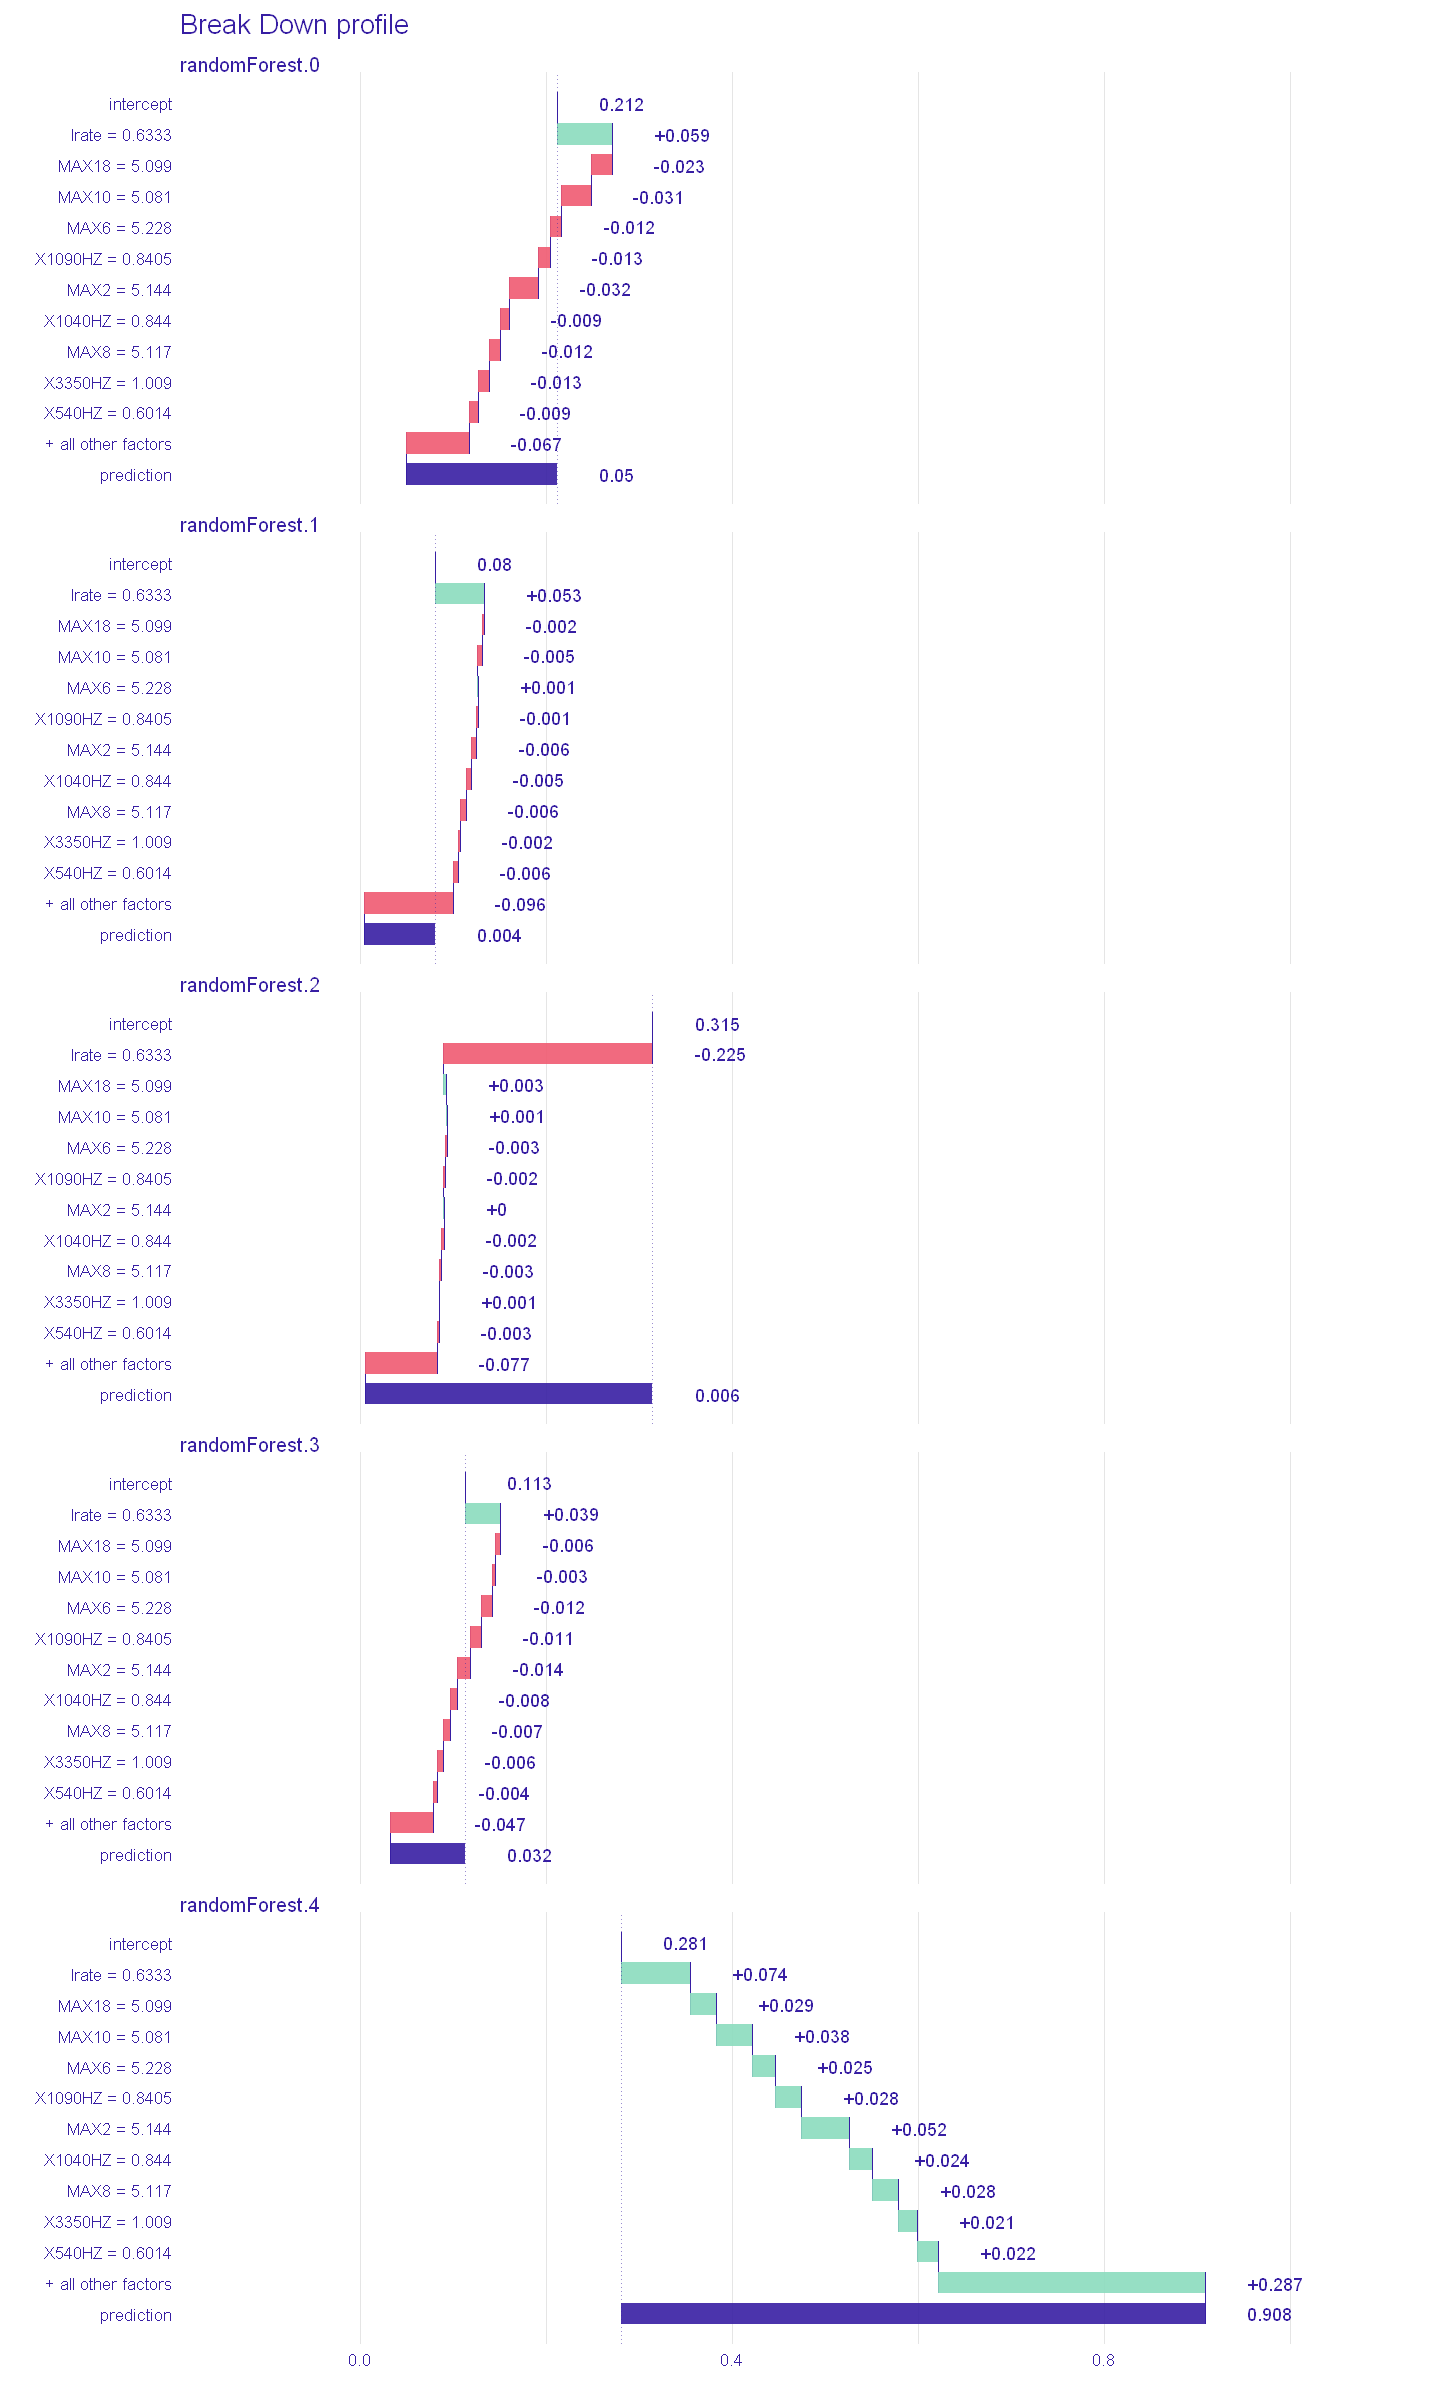

In [191]:
options(repr.plot.width = 12, repr.plot.height = 20)
plot(shap_values)

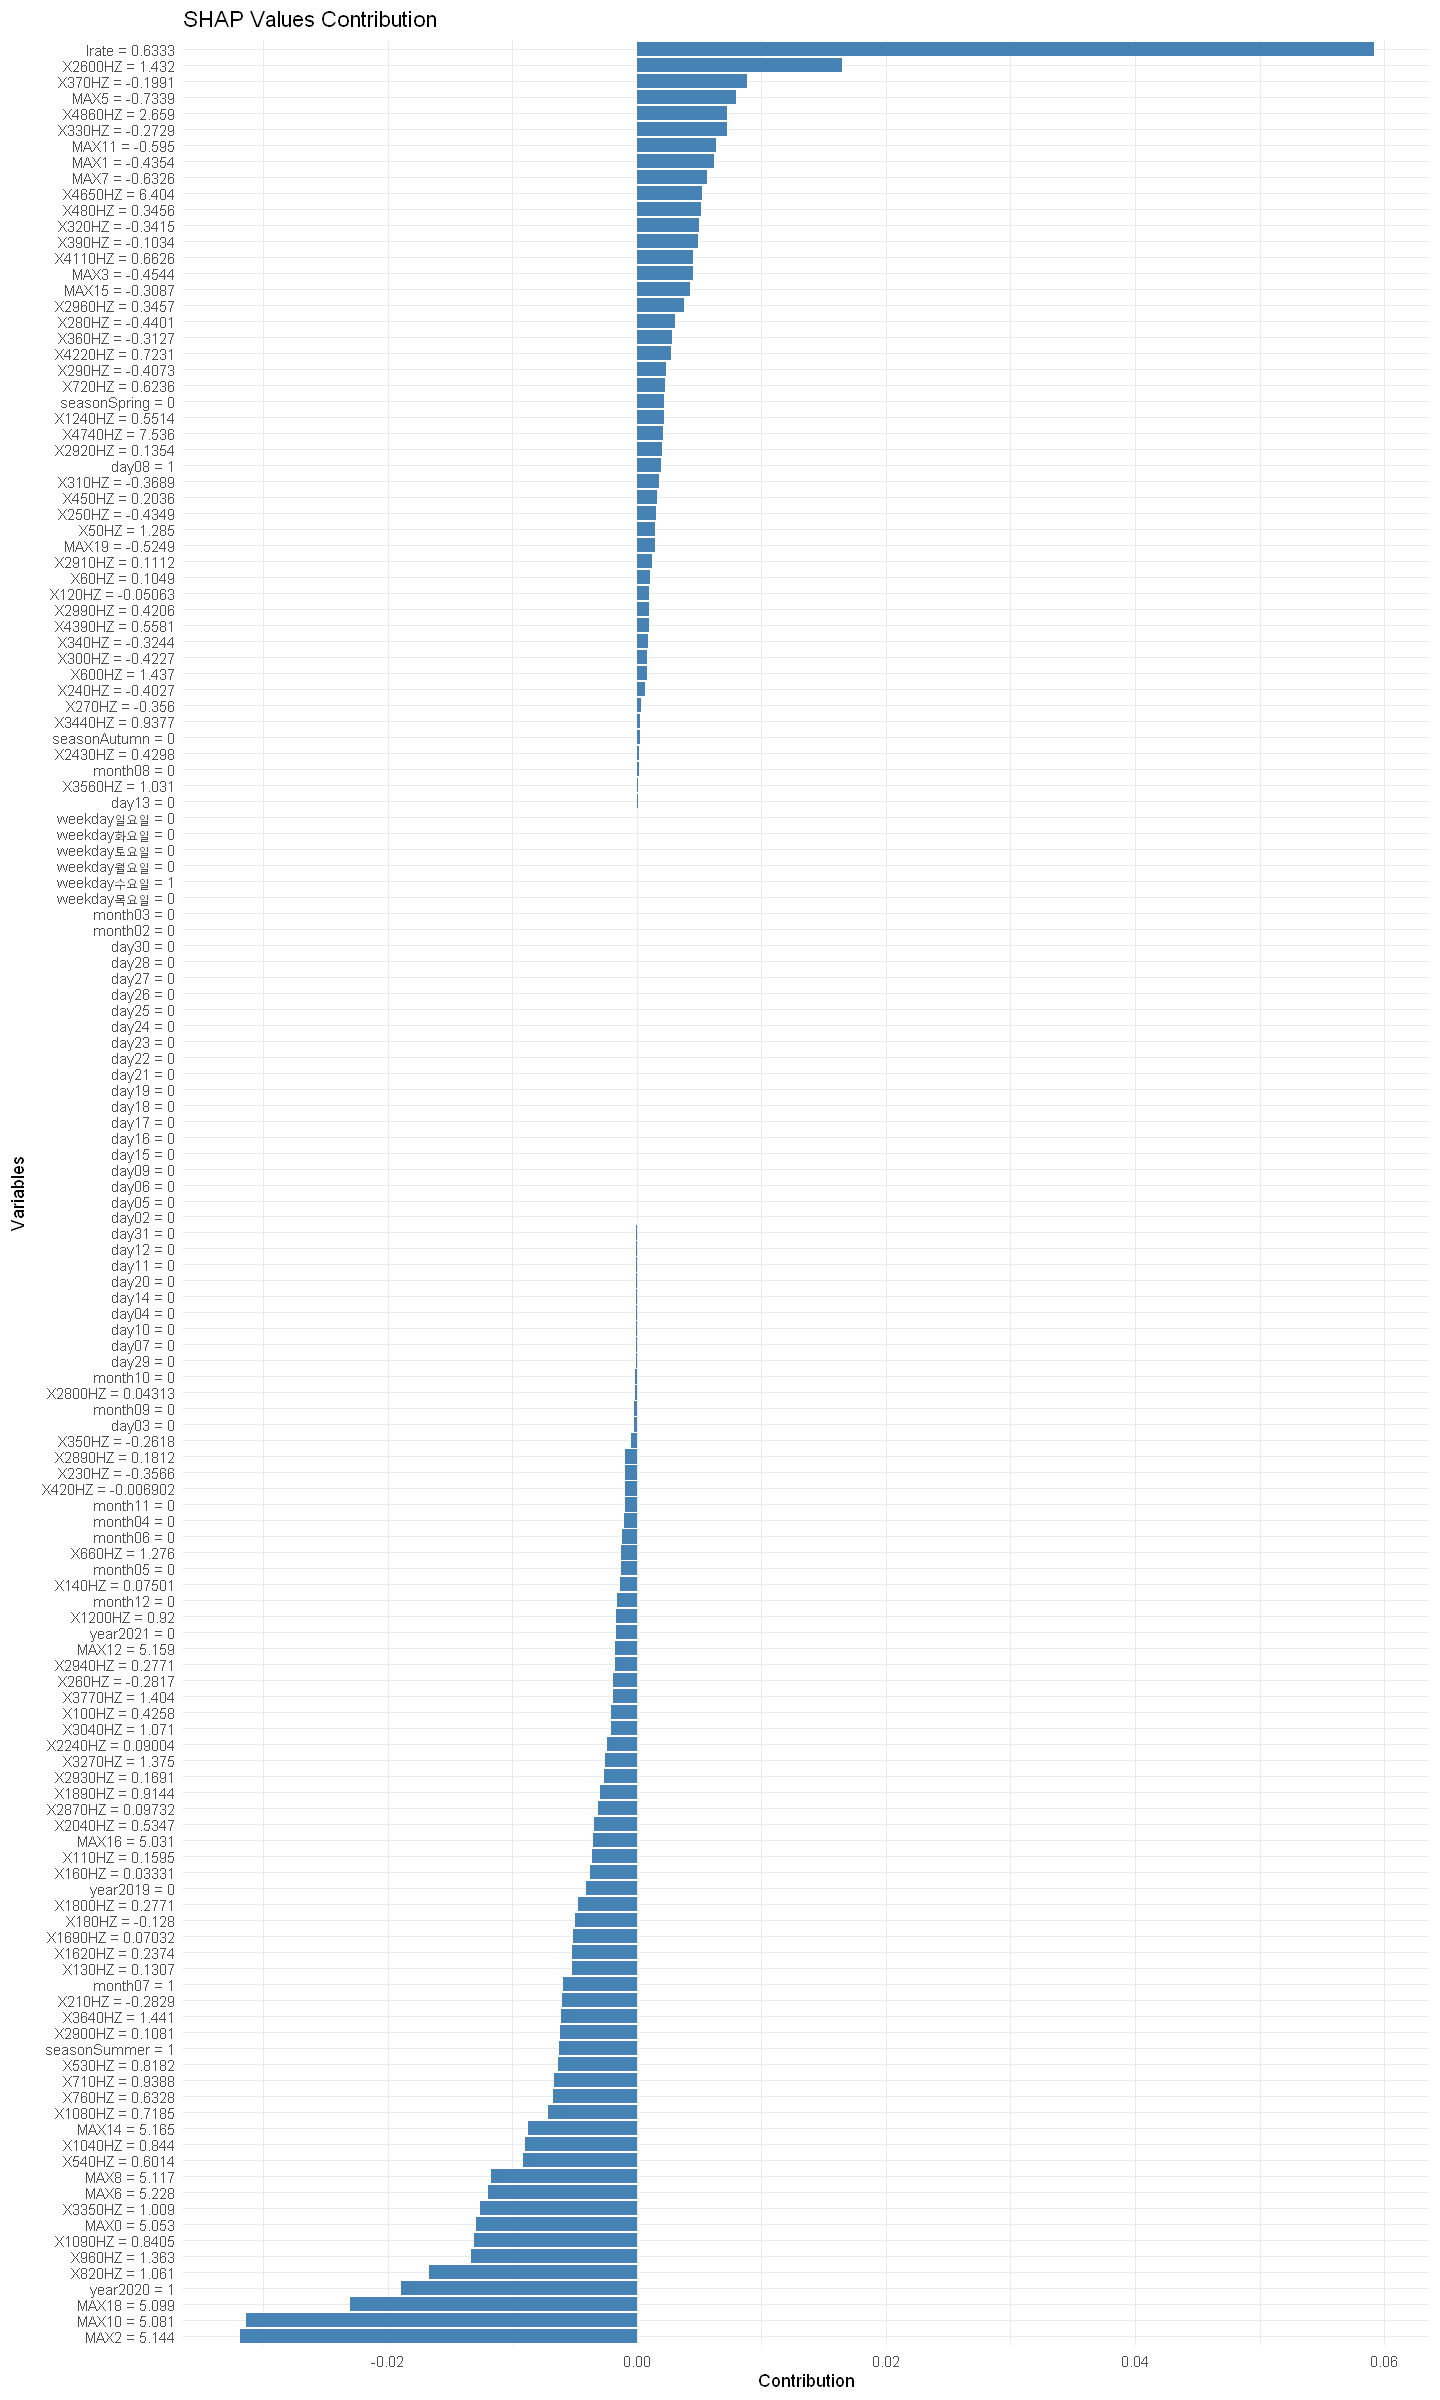

In [192]:
# 데이터 준비
sorted_contributions <- shap_values %>%
  subset(label == "randomForest.0") %>%
  filter(!variable %in% c("intercept", "prediction")) %>%
  arrange(contribution)  # 기여도를 오름차순으로 정렬

options(repr.plot.width = 12, repr.plot.height = 20)

# 막대그래프 그리기
ggplot(sorted_contributions, aes(x = reorder(variable, contribution), y = contribution)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "SHAP Values Contribution", x = "Variables", y = "Contribution") +
  theme_minimal() +
  coord_flip()  # 수평 막대그래프


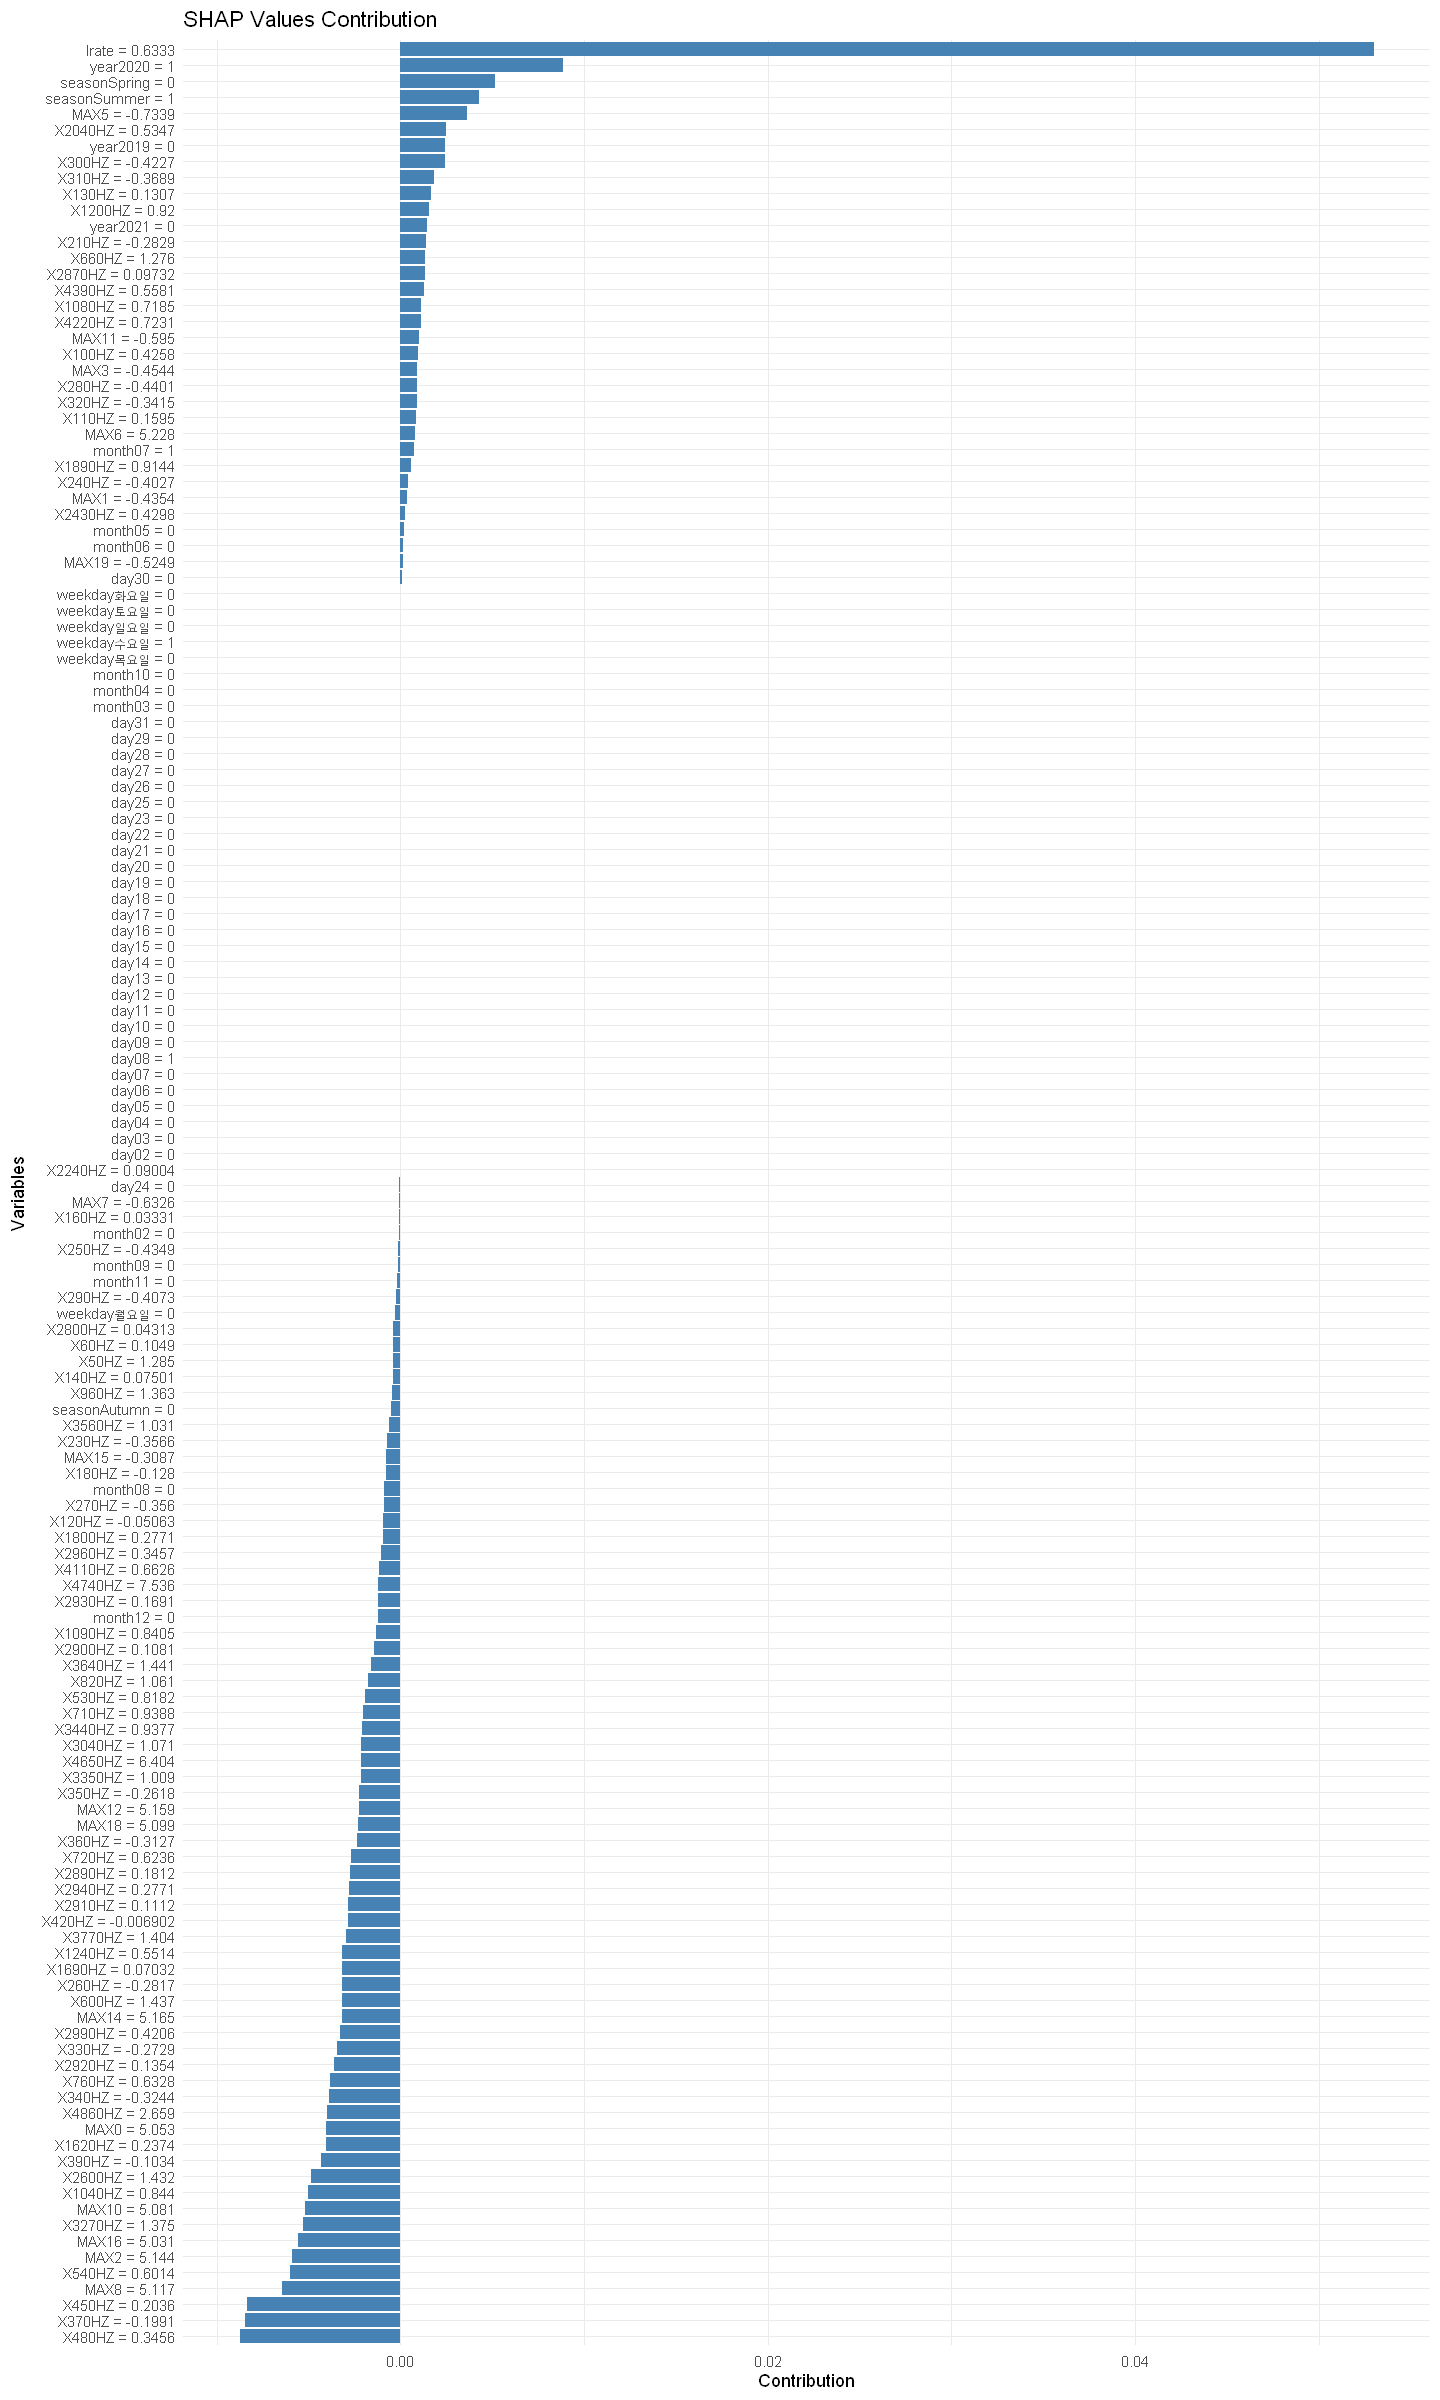

In [193]:
# 데이터 준비
sorted_contributions <- shap_values %>%
  subset(label == "randomForest.1") %>%
  filter(!variable %in% c("intercept", "prediction")) %>%
  arrange(contribution)  # 기여도를 오름차순으로 정렬

options(repr.plot.width = 12, repr.plot.height = 20)

# 막대그래프 그리기
ggplot(sorted_contributions, aes(x = reorder(variable, contribution), y = contribution)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "SHAP Values Contribution", x = "Variables", y = "Contribution") +
  theme_minimal() +
  coord_flip()  # 수평 막대그래프

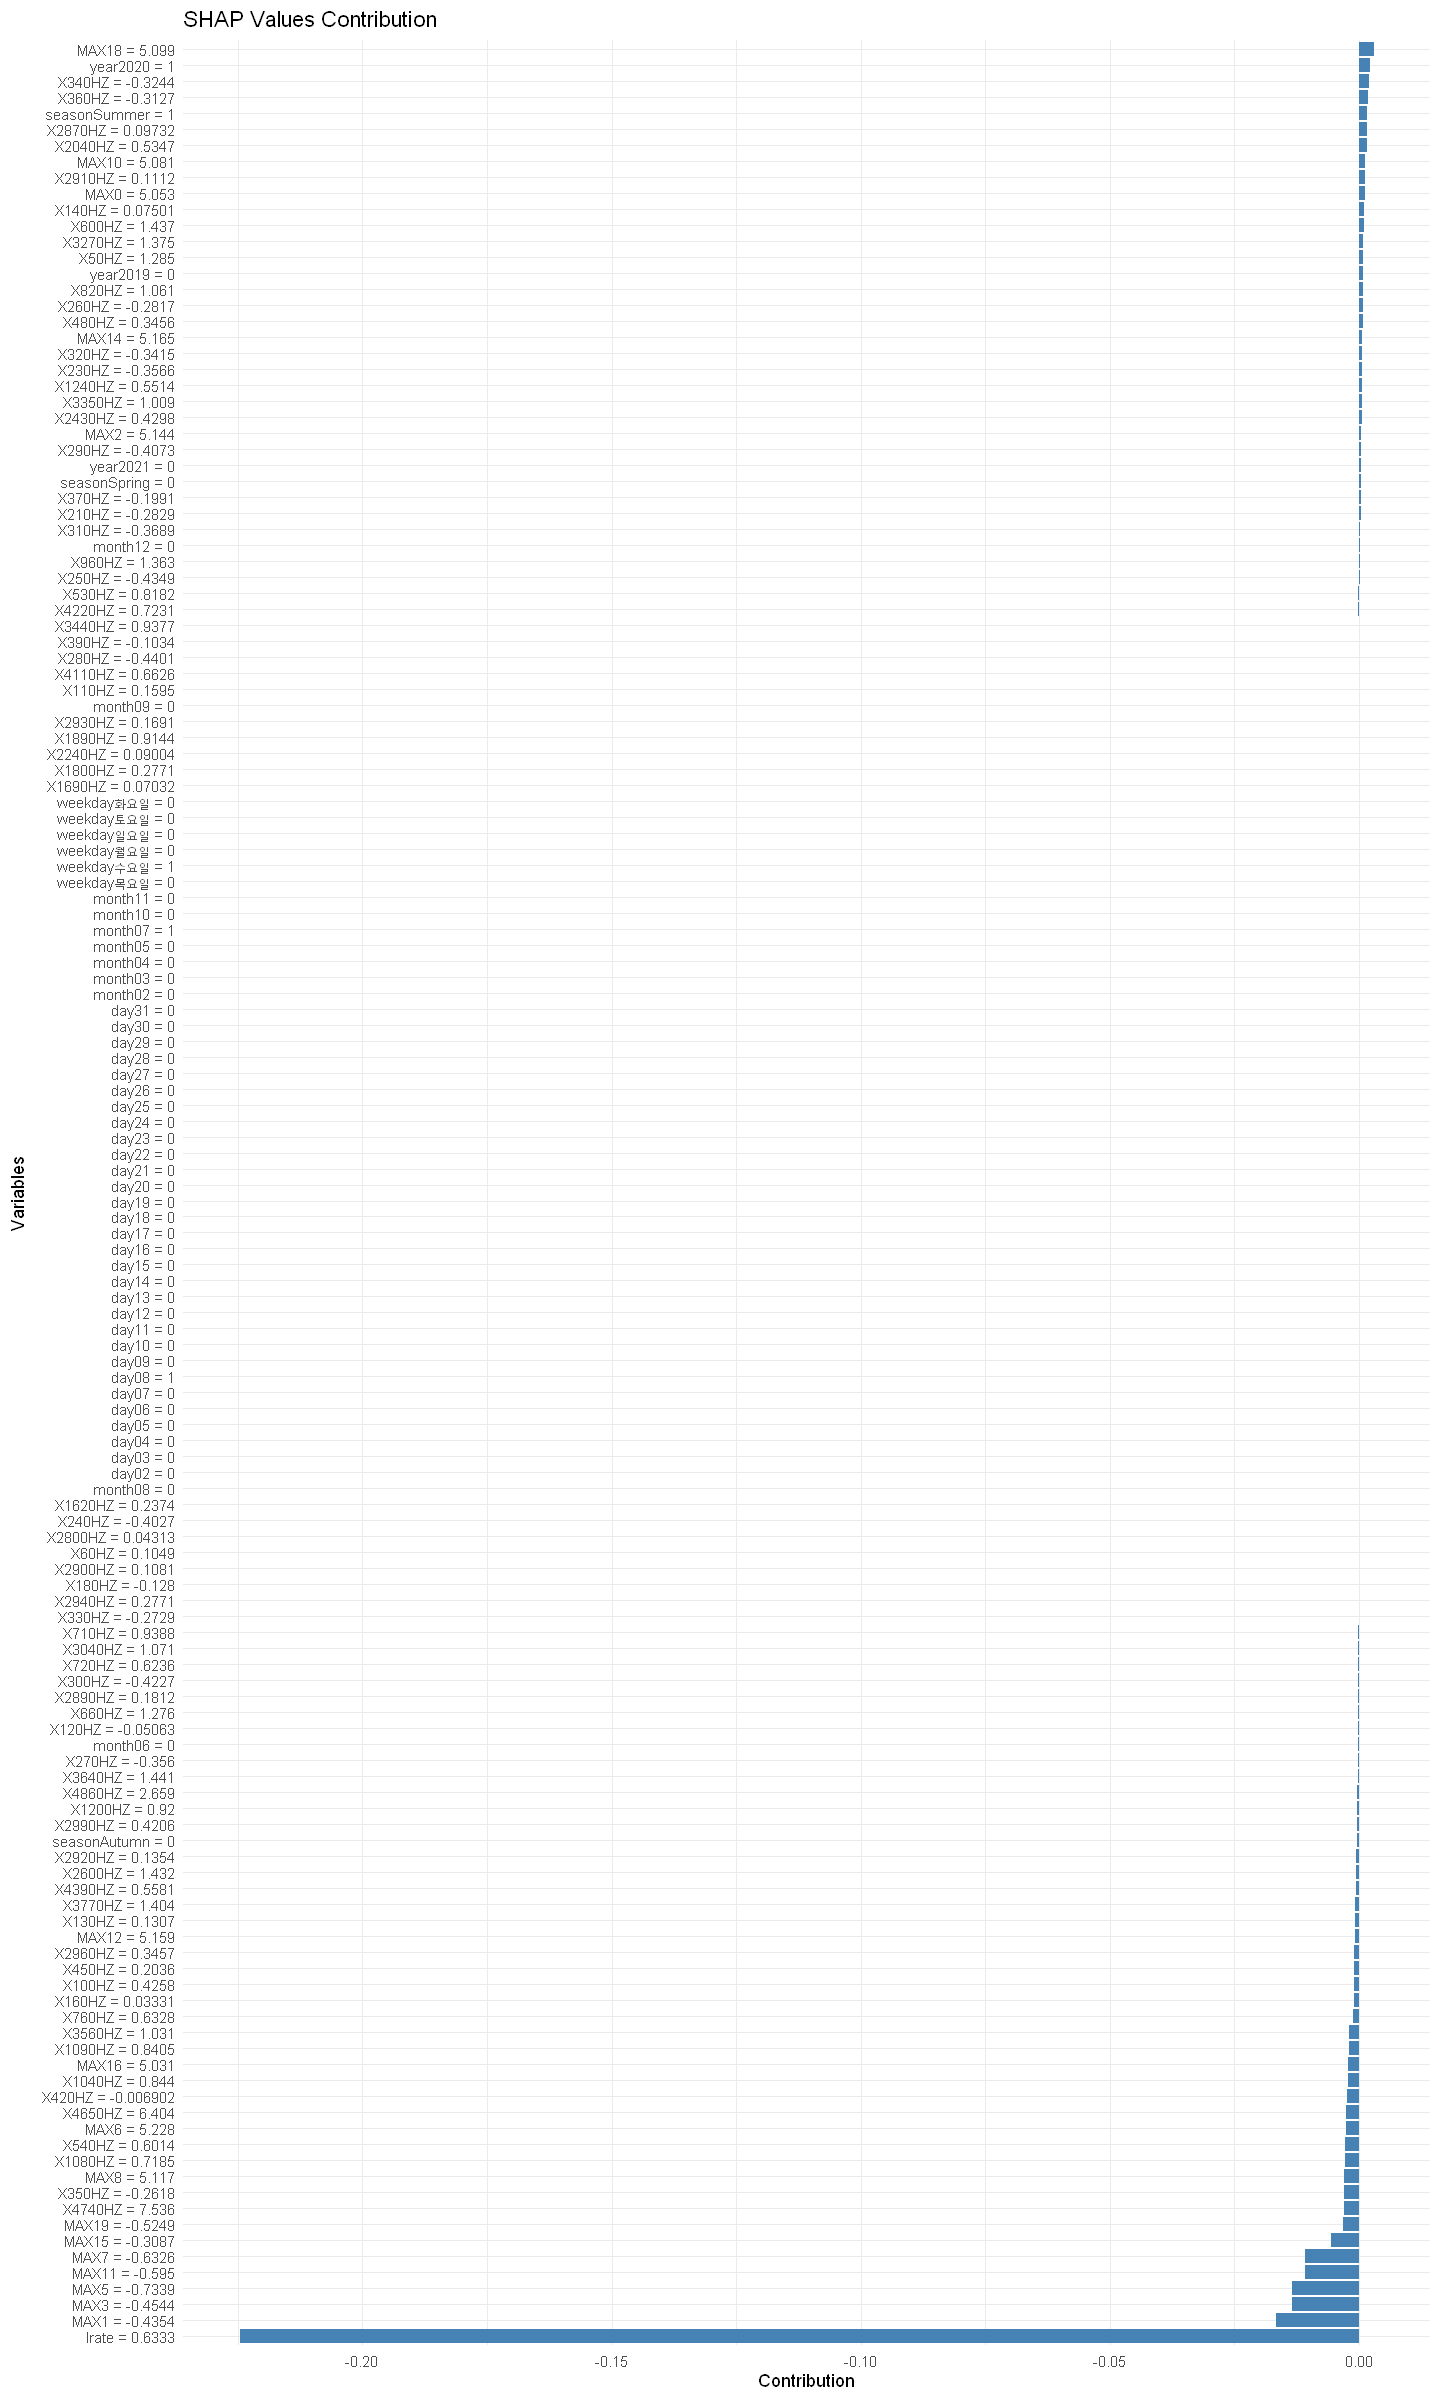

In [194]:
# 데이터 준비
sorted_contributions <- shap_values %>%
  subset(label == "randomForest.2") %>%
  filter(!variable %in% c("intercept", "prediction")) %>%
  arrange(contribution)  # 기여도를 오름차순으로 정렬

options(repr.plot.width = 12, repr.plot.height = 20)

# 막대그래프 그리기
ggplot(sorted_contributions, aes(x = reorder(variable, contribution), y = contribution)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "SHAP Values Contribution", x = "Variables", y = "Contribution") +
  theme_minimal() +
  coord_flip()  # 수평 막대그래프

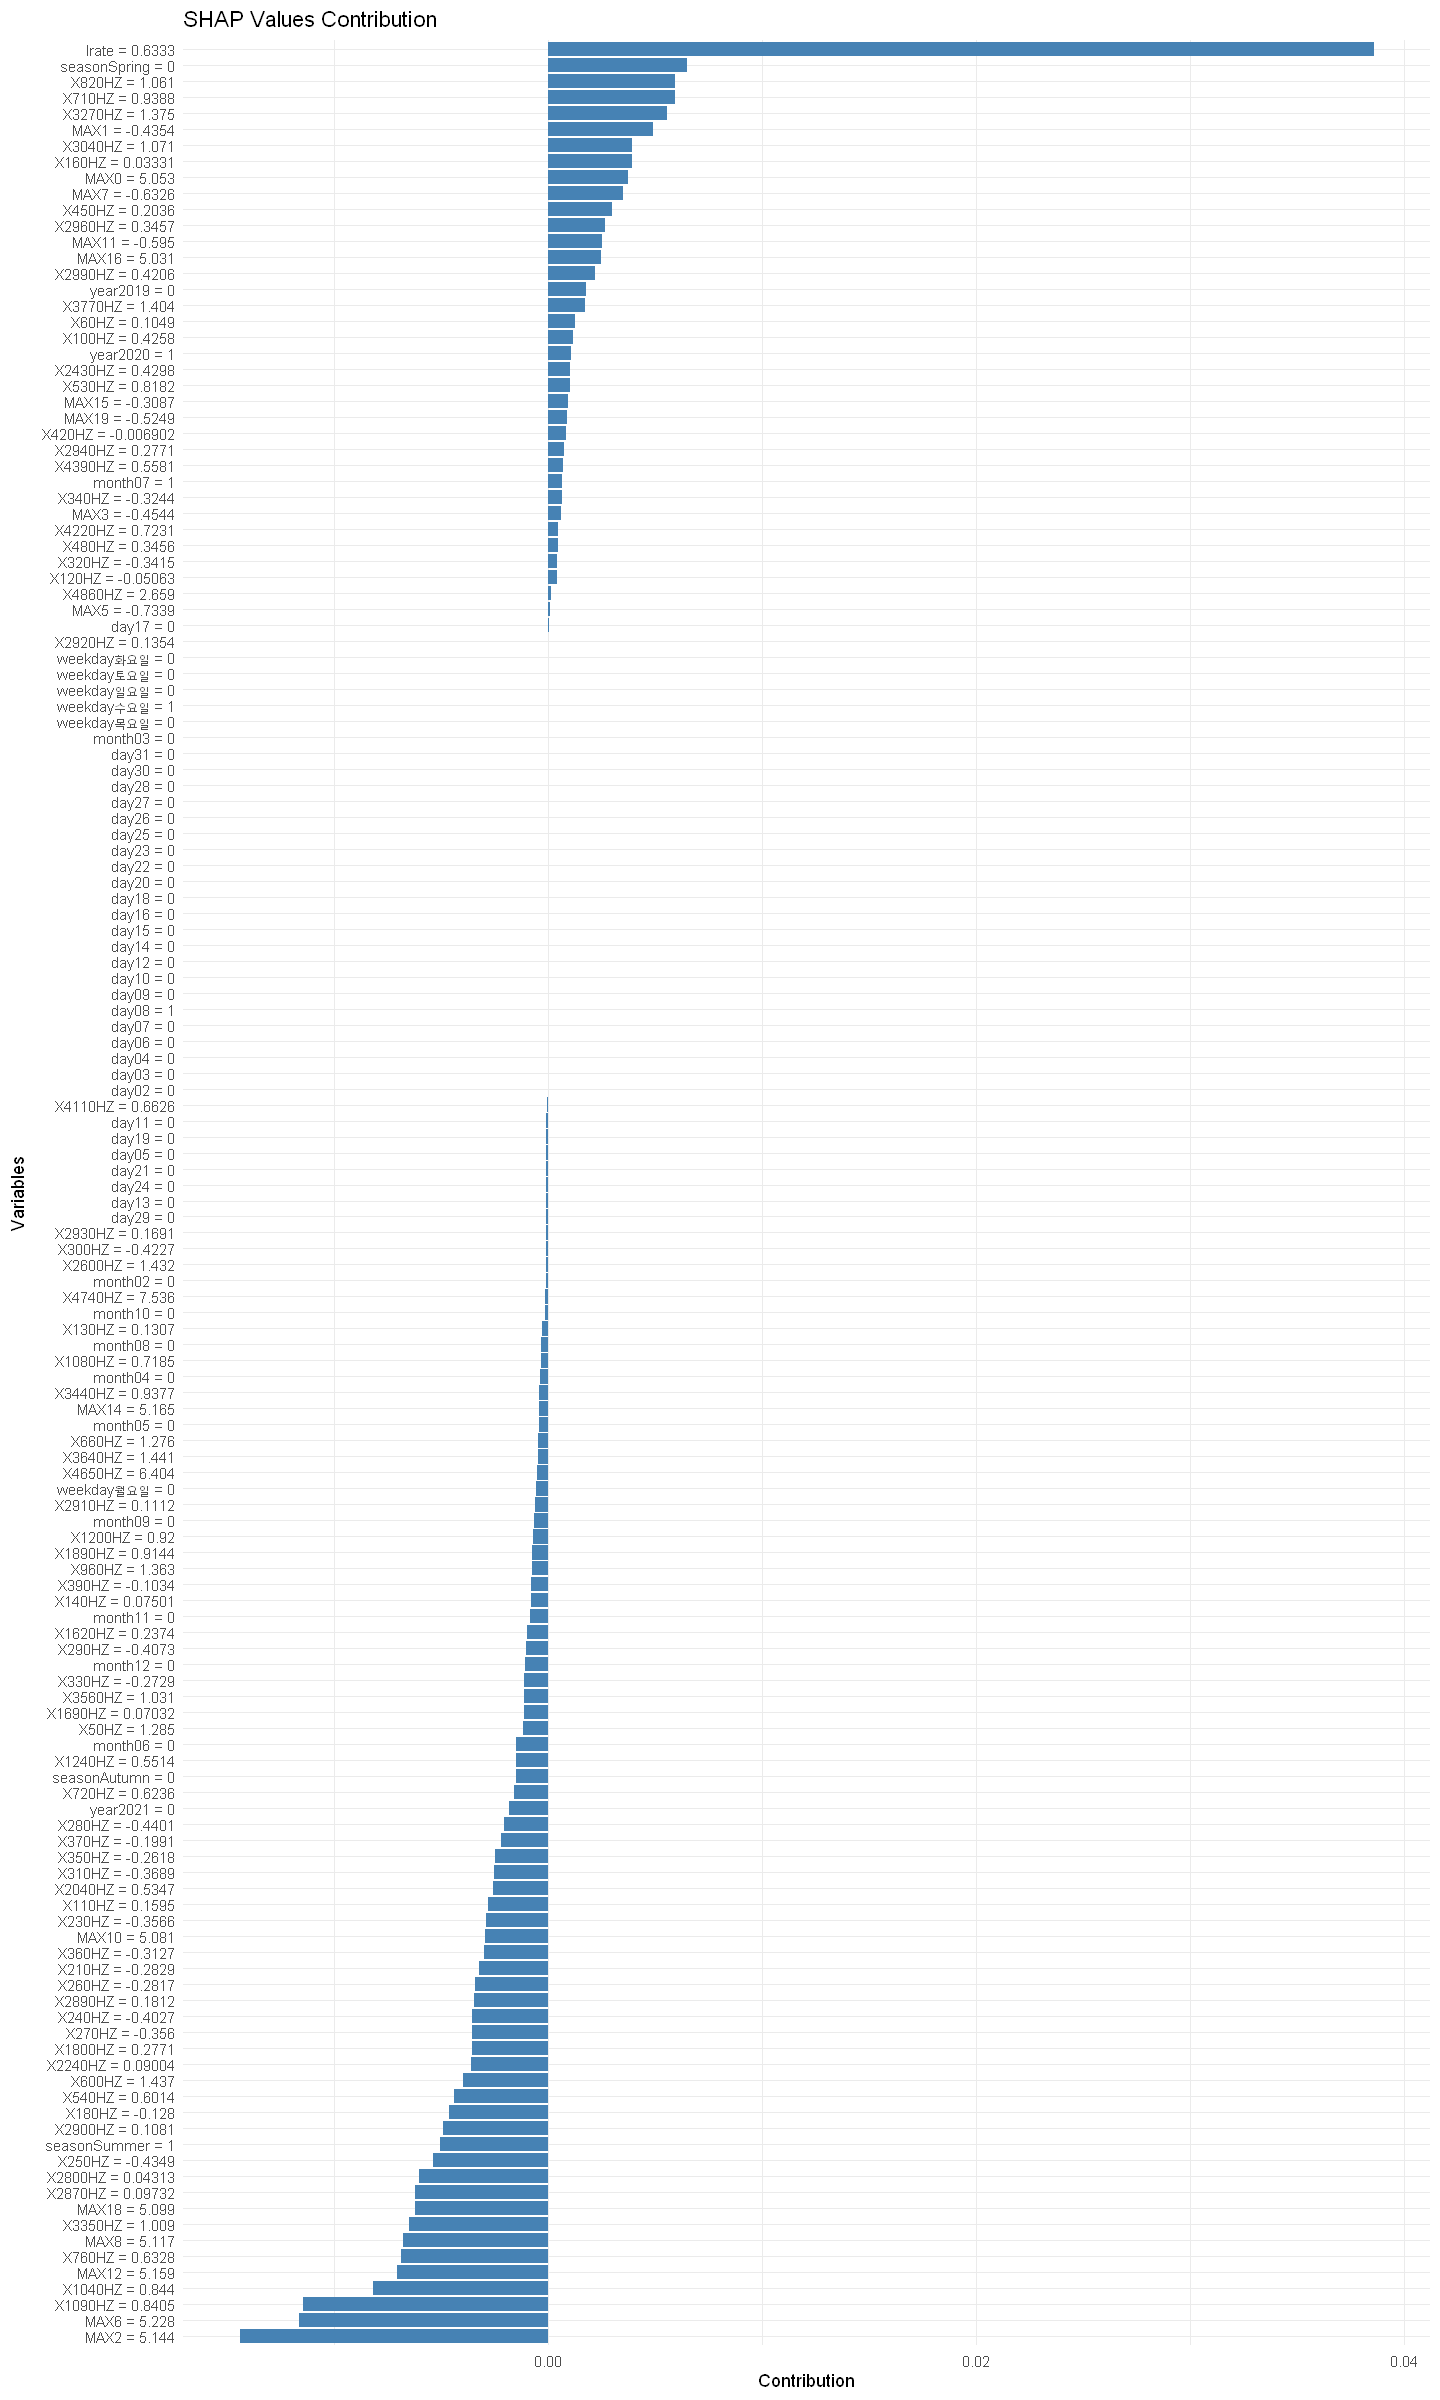

In [195]:
# 데이터 준비
sorted_contributions <- shap_values %>%
  subset(label == "randomForest.3") %>%
  filter(!variable %in% c("intercept", "prediction")) %>%
  arrange(contribution)  # 기여도를 오름차순으로 정렬

options(repr.plot.width = 12, repr.plot.height = 20)

# 막대그래프 그리기
ggplot(sorted_contributions, aes(x = reorder(variable, contribution), y = contribution)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "SHAP Values Contribution", x = "Variables", y = "Contribution") +
  theme_minimal() +
  coord_flip()  # 수평 막대그래프

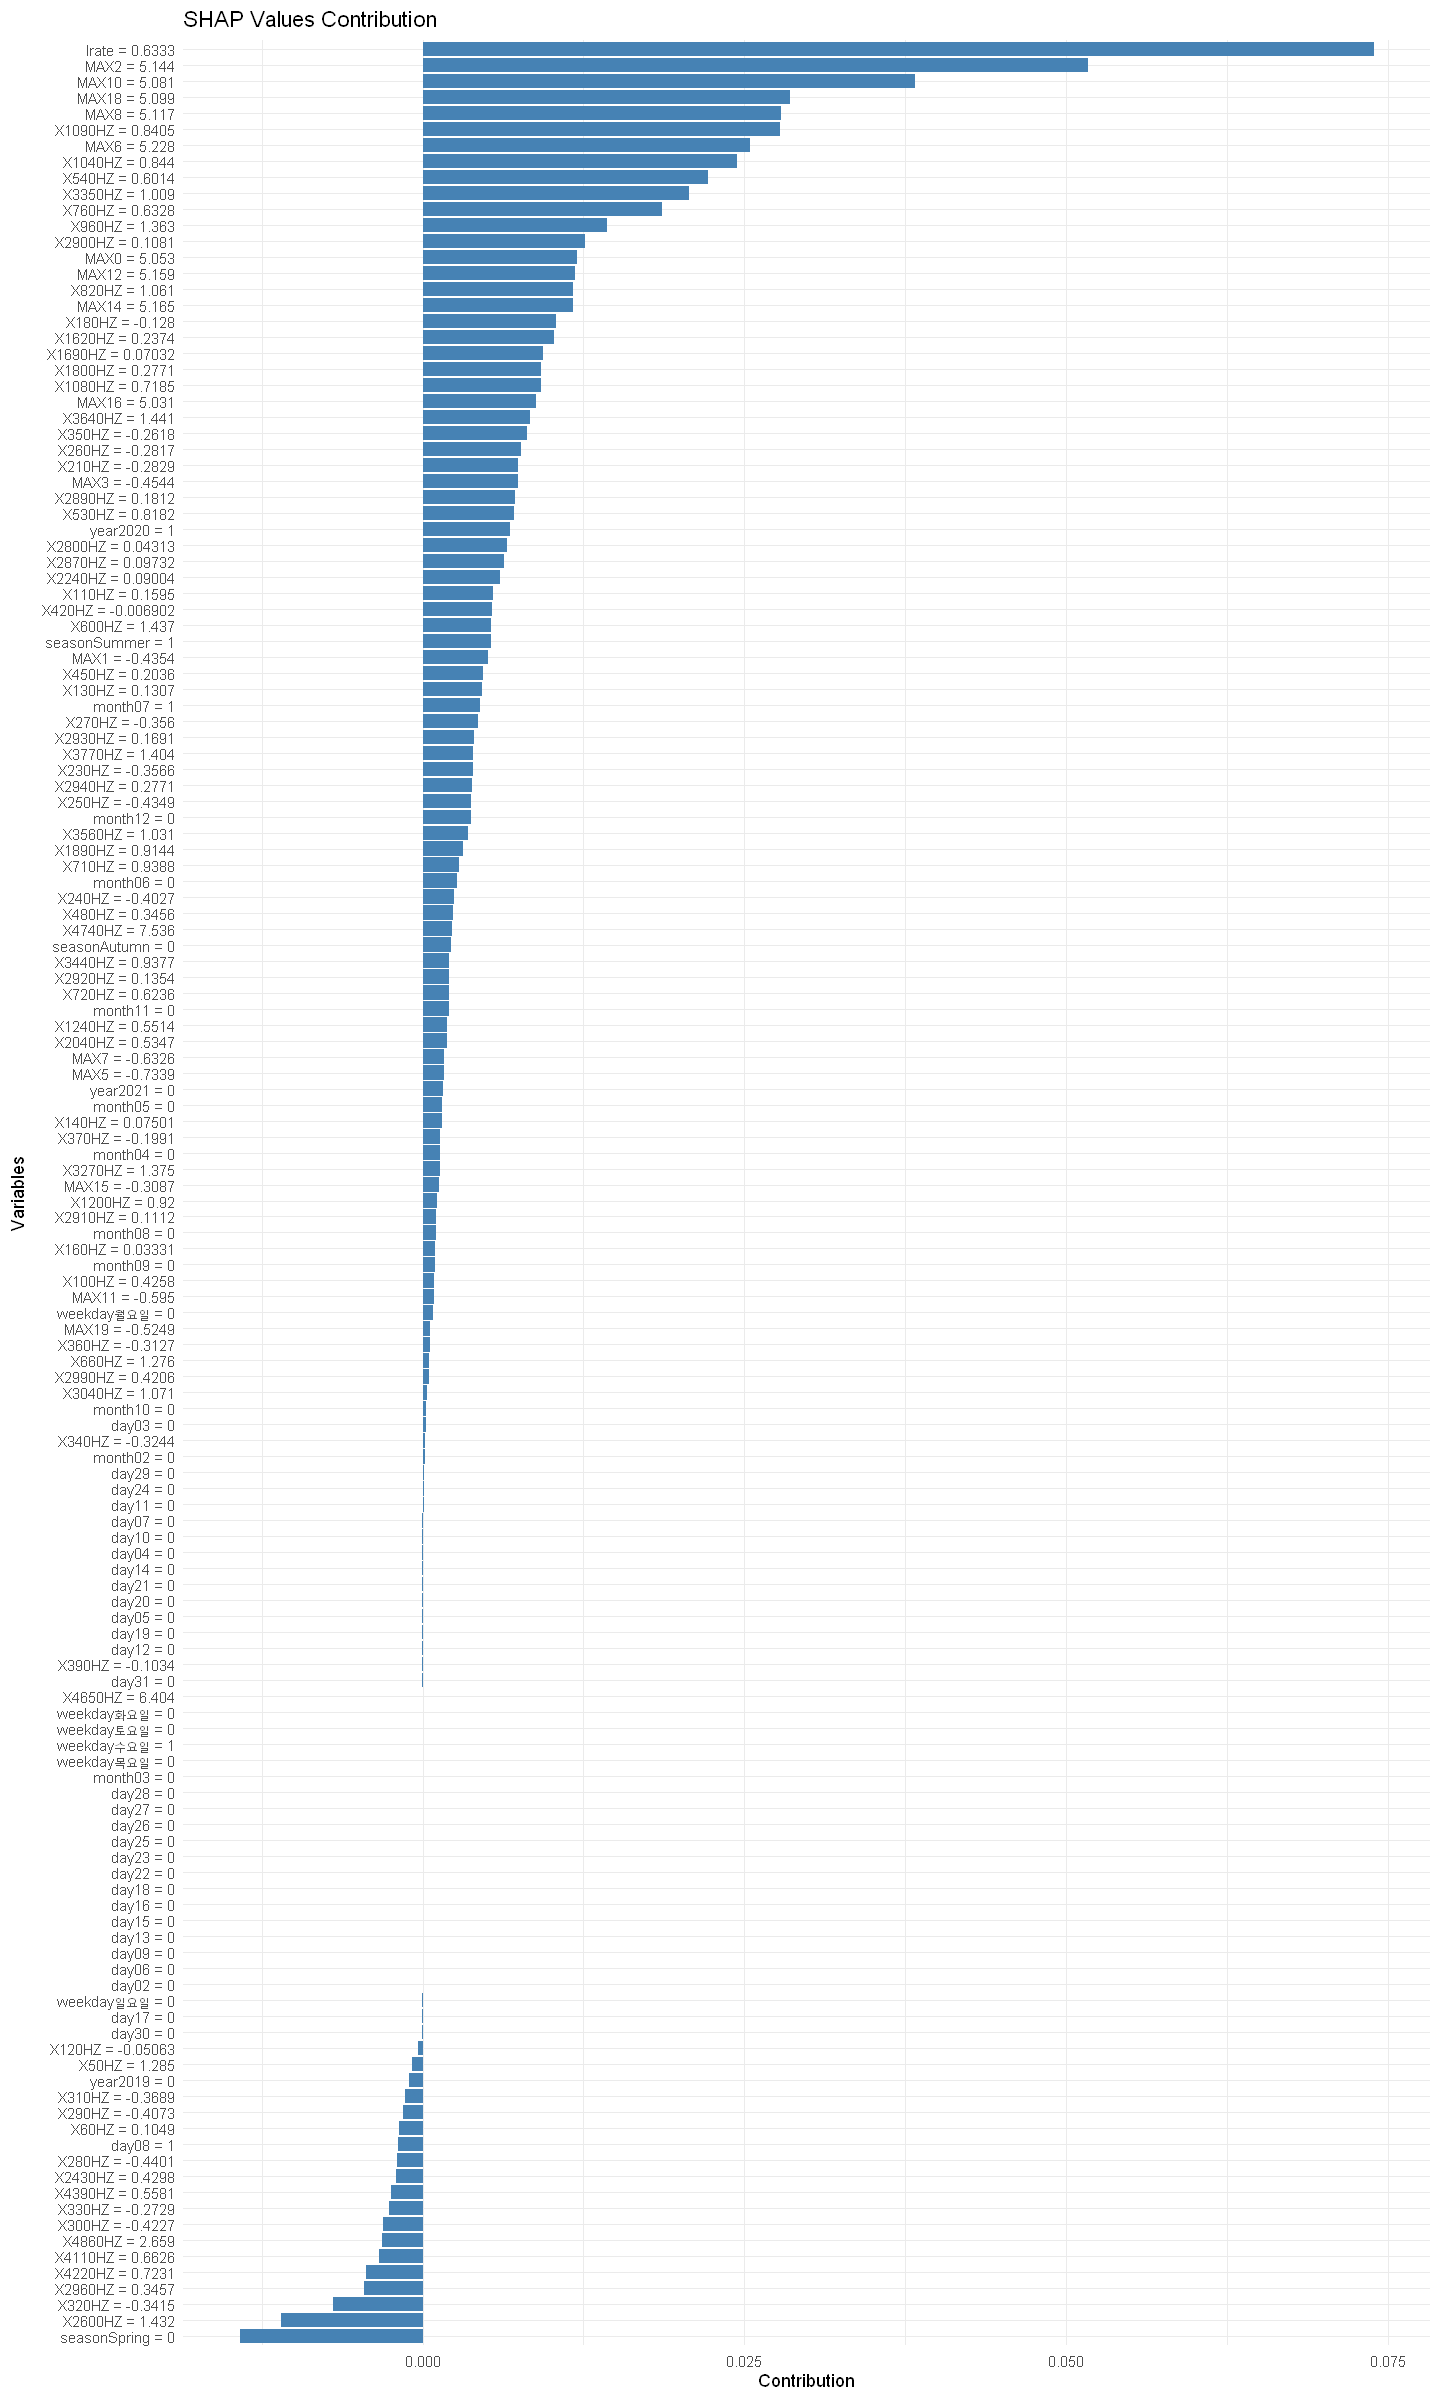

In [196]:
# 데이터 준비
sorted_contributions <- shap_values %>%
  subset(label == "randomForest.4") %>%
  filter(!variable %in% c("intercept", "prediction")) %>%
  arrange(contribution)  # 기여도를 오름차순으로 정렬

options(repr.plot.width = 12, repr.plot.height = 20)

# 막대그래프 그리기
ggplot(sorted_contributions, aes(x = reorder(variable, contribution), y = contribution)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "SHAP Values Contribution", x = "Variables", y = "Contribution") +
  theme_minimal() +
  coord_flip()  # 수평 막대그래프

# 모델 튜닝

### 교차 검증 및 랜덤 서치

In [23]:
# 팩터 레벨 변경을 위한 매핑 정의
level_mapping <- c("In", "noise", "normal", "other", "out")

# 새로운 레벨을 사용하여 팩터 레벨 변경
train_scaled$y <- factor(train_scaled$y, levels = levels(train_scaled$y), labels = level_mapping)
test_scaled$y <- factor(test_scaled$y, levels = levels(test_scaled$y), labels = level_mapping)

In [24]:
control <- trainControl(
  method = "cv", 
  number = 5, 
  search = "random",    # 랜덤 서치 사용
  summaryFunction = multiClassSummary, 
  classProbs = TRUE, 
  savePredictions = TRUE
)

In [25]:
library(doParallel)

# 클러스터 설정
cluster <- makeCluster(detectCores() - 1)
registerDoParallel(cluster)

# 랜덤 포레스트 모델 학습
set.seed(22)

cluster_fit_model_time <- system.time({
  rf_model <- train(
      y ~ ., 
      data = train_scaled, 
      method = "rf", 
      trControl = control,
      tuneLength = 10,     # 랜덤 서치 시도할 조합의 수
      metric = "Accuracy"
    )
})
cluster_fit_model_time
rf_model

# 클러스터 종료
stopCluster(cluster)
registerDoSEQ()

Loading required package: foreach


Attaching package: 'foreach'


The following objects are masked from 'package:purrr':

    accumulate, when


Loading required package: iterators

Loading required package: parallel



    user   system  elapsed 
 2305.26    30.10 31154.26 

Random Forest 

49271 samples
  144 predictor
    5 classes: 'In', 'noise', 'normal', 'other', 'out' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 39417, 39416, 39418, 39416, 39417 
Resampling results across tuning parameters:

  mtry  logLoss    AUC        prAUC      Accuracy   Kappa      Mean_F1  
   16   0.2908224  0.9960184  0.9150680  0.9544762  0.9397574  0.9390818
   44   0.2554813  0.9965665  0.8290741  0.9580889  0.9445586  0.9444031
   59   0.2505181  0.9965265  0.8059483  0.9579468  0.9443736  0.9446142
   67   0.2496028  0.9964845  0.7965669  0.9582107  0.9447227  0.9448659
   74   0.2468669  0.9965025  0.7922849  0.9576829  0.9440248  0.9441691
   88   0.2443890  0.9964047  0.7861007  0.9572161  0.9434069  0.9437805
  101   0.2430001  0.9963287  0.7816176  0.9569726  0.9430852  0.9432615
  116   0.2411255  0.9961592  0.7793368  0.9566276  0.9426314  0.9425938
  124   0.2405299  0.9959735  0.7784118  0.9556331  0.9413180  0.9419667
  128

In [26]:
# 최적의 하이퍼파라미터 출력
print(rf_model$bestTune)

  mtry
4   67


In [27]:
pred <- predict(rf_model, newdata = test_scaled[, -which(names(test_scaled) == "y")])
tabs6<-xtabs(~pred+test_scaled$y)

#library(caret)
confusionMatrix(tabs6)

Confusion Matrix and Statistics

        test_scaled$y
pred       In noise normal other  out
  In     4236    62      0    82   76
  noise    42  1550      0    34   20
  normal    0     0   6649     0    0
  other    31    26      0  2133   32
  out     170    59      0   120 5791

Overall Statistics
                                          
               Accuracy : 0.9643          
                 95% CI : (0.9617, 0.9668)
    No Information Rate : 0.3149          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9528          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: In Class: noise Class: normal Class: other
Sensitivity             0.9457      0.91338        1.0000       0.9004
Specificity             0.9868      0.99506        1.0000       0.9953
Pos Pred Value          0.9506      0.94168        1.0000       0.9599
Neg

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases



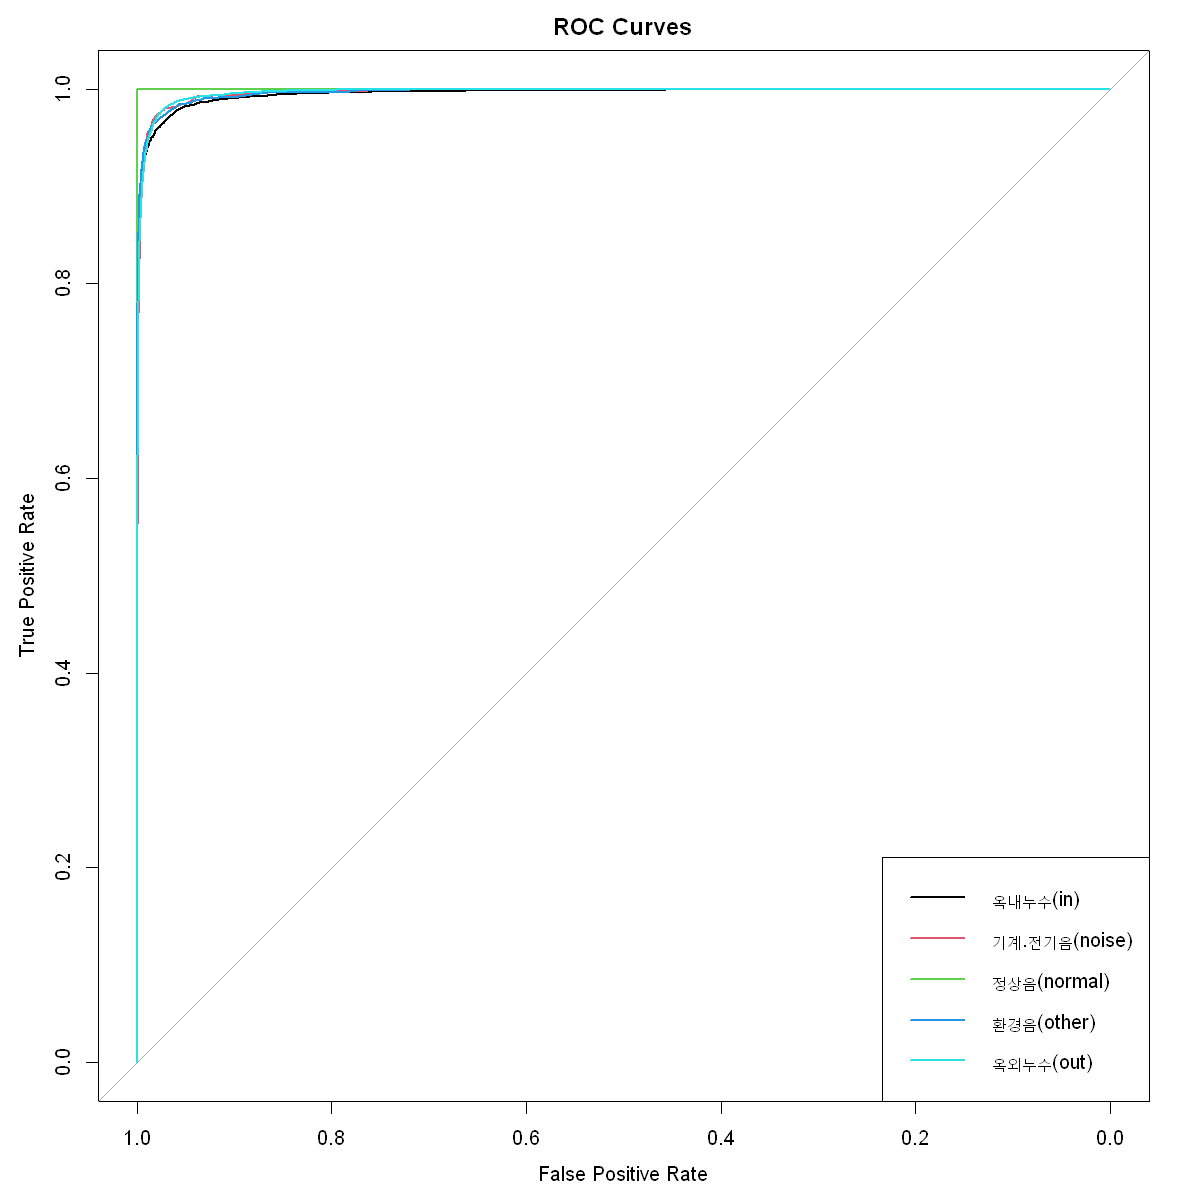

In [35]:
# 예측 확률 계산
pred_probs <- predict(rf_model, newdata = test_scaled[, -which(names(test_scaled) == "y")], type = "prob")

# 클래스 레벨과 새로운 이름 매핑
class_labels <- c("옥내누수(in)", "기계.전기음(noise)", "정상음(normal)", "환경음(other)", "옥외누수(out)")
names(class_labels) <- levels(test_scaled$y)

# 각 클래스에 대한 ROC 곡선 계산
roc_list <- lapply(levels(test_scaled$y), function(class) {
  roc(test_scaled$y == class, pred_probs[, class])
})

options(repr.plot.width = 10, repr.plot.height = 10)

# ROC 곡선 그리기 (x축 라벨 수정)
plot(roc_list[[1]], col = 1, main = "ROC Curves", xlab = "False Positive Rate", ylab = "True Positive Rate")
for (i in 2:length(roc_list)) {
  plot(roc_list[[i]], add = TRUE, col = i)
}

# 레전드 추가
legend("bottomright", legend = class_labels[levels(test_scaled$y)], col = 1:length(roc_list), lwd = 2)

# 모델 저장

In [34]:
saveRDS(rf_model, file = "model_rf.rds")

In [23]:
list.files()

[1] "merged_data.csv"                                                    
[2] "model_rf.rds"                                                       
[3] "데이터 마이닝 프로젝트 - 머신러닝을 활용한 상수도관 누수 감지.ipynb"
[4] "상하수도 데이터(상수관로 누수 감지)"